Uploading the Sleep Efficiency Data set, The Dataset can be described as below.

1.   ID - A unique identifier for each test subject.
2.   Age - Age of the test subject.
3.   Gender - Male or Female Gender of the test subject.
4.   Bedtime - The time the test subject goes to bed each night.
5.   Wakeup time - The time the test subject wakes up each morning.
6.   Sleep duration - The total amount of time the test subject slept (in hours).
7.   Sleep efficiency - A measure of the proportion of time in bed spent asleep.
8.   REM sleep percentage - The percentage of total sleep time spent in REM sleep.
9.   Deep sleep percentage - The percentage of total sleep time spent in deep sleep.
10.  Light sleep percentage - The percentage of total sleep time spent in light sleep.
11.  Awakenings - The number of times the test subject wakes up during the night.
12.  Caffeine Consumption - The amount of caffeine consumed in the 24 hours prior to bedtime (in mg).
13.  Alcohol Consumption - the amount of alcohol consumed in the 24 hours prior to bedtime (in oz).
14.  Smoking status - Whether or not the test subject smokes.
15.  Exercise Frequency - the number of times the test subject exercises each week.



In [56]:
!pip install h2o
%matplotlib inline
import random, os, sys
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

In [57]:
import seaborn as sns
url = 'https://raw.githubusercontent.com/sarthaksomvanshi10/ML-Data-Cleaning-and-Feature-Selection/main/Sleep_Efficiency.csv'

corr_data = pd.read_csv(url, sep=',')
data2 = pd.read_csv(url, sep=',')

In [58]:
corr_data

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,06-03-2021 01:00,06-03-2021 07:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,05-12-2021 02:00,05-12-2021 09:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,25-05-2021 21:30,25-05-2021 05:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,03-11-2021 02:30,03-11-2021 08:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,13-03-2021 01:00,13-03-2021 09:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,13-11-2021 22:00,13-11-2021 05:30,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,31-03-2021 21:00,31-03-2021 03:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,07-09-2021 23:00,07-09-2021 07:30,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,29-07-2021 21:00,29-07-2021 04:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


As for the Columns like Smoking status and Gender we have non numeric value and for performing regression we need to convert them into numeric value we will do following changes:



1.   Gender = Consider 'Male' value as '0' and 'Female' value as '1'
2.   Smoking status = Consider 'No' value as '0' and 'Yes' value as '1'
So we will replace thes values below


In [59]:
corr_data["Smoking status"] = corr_data["Smoking status"].replace({"Yes": 1, "No": 0})
corr_data['Gender']=corr_data['Gender'].map({'Male':0, 'Female':1})
corr_data=corr_data.drop(['Bedtime','Wakeup time'], axis=1) #as both are date and time format which we wont be using for regression we will drop both column
corr_data=corr_data.drop(['ID'], axis=1)# its a unique identifier and doesn't have a significant weightage while performing regression


As for the Columns like Smoking status and Gender we have non numeric value and for performing regression we need to convert them into numeric value we will do following changes:



1.   Gender = Consider 'Male' value as '0' and 'Female' value as '1'
2.   Smoking status = Consider 'No' value as '0' and 'Yes' value as '1'
So we will replace thes values below


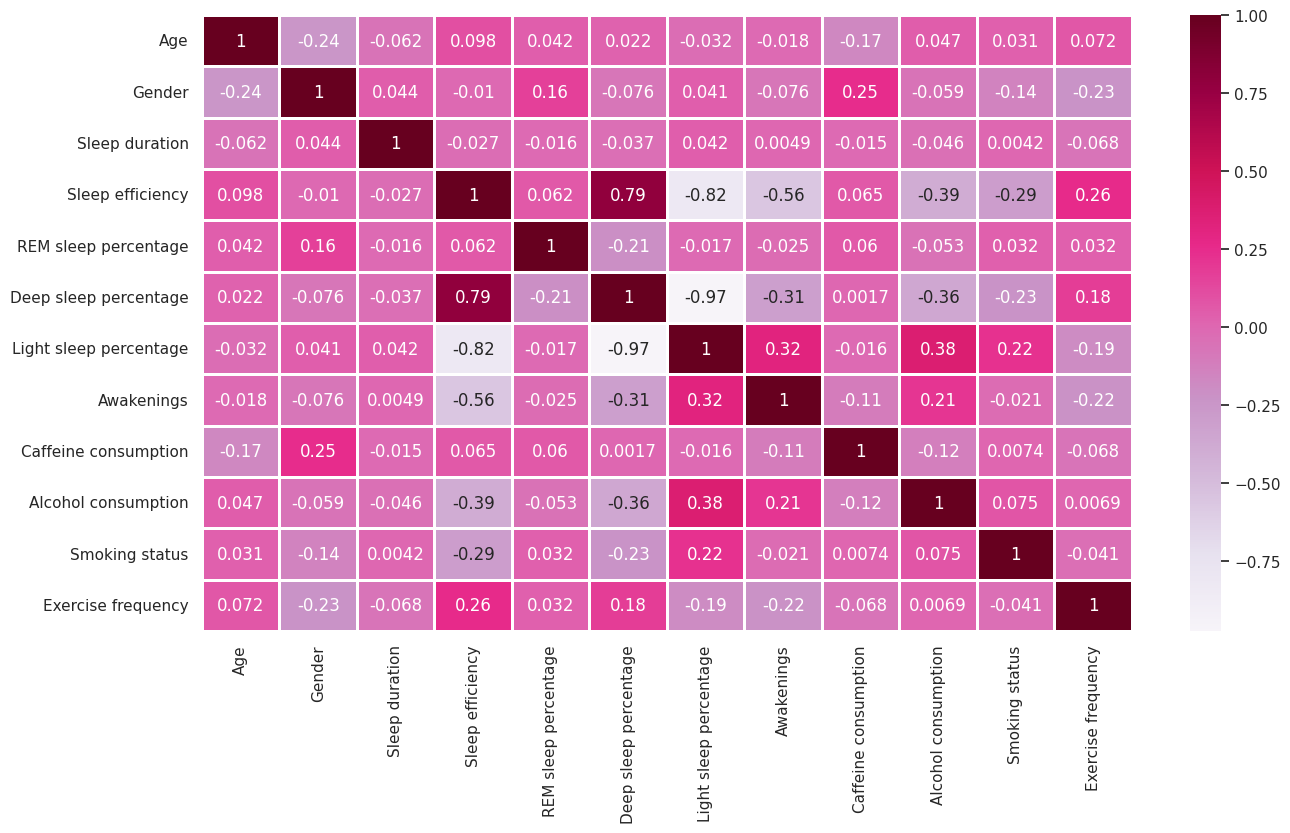

In [60]:
import matplotlib.pyplot as plt
# Create a figure with a specified size
fig, ay = plt.subplots(figsize=(15, 8))

# Generate the heatmap
sns.heatmap(corr_data.corr(), linewidths=0.9, annot=True, ax=ay, cmap='PuRd')

# Show the plot
plt.show()

The correlation heatmap shows that there is very little to no correlation between the independent variables. This suggests that each variable is independent of the others. The closer the values are to 1 and -1, the stronger the positive or negative correlation between two features.



We can see there are lot of co-relation among the variables. The co-relation between Sleep efficiency and Deep sleep percentage being the highest, it may mean that essentially both are measuring or predicting same thing


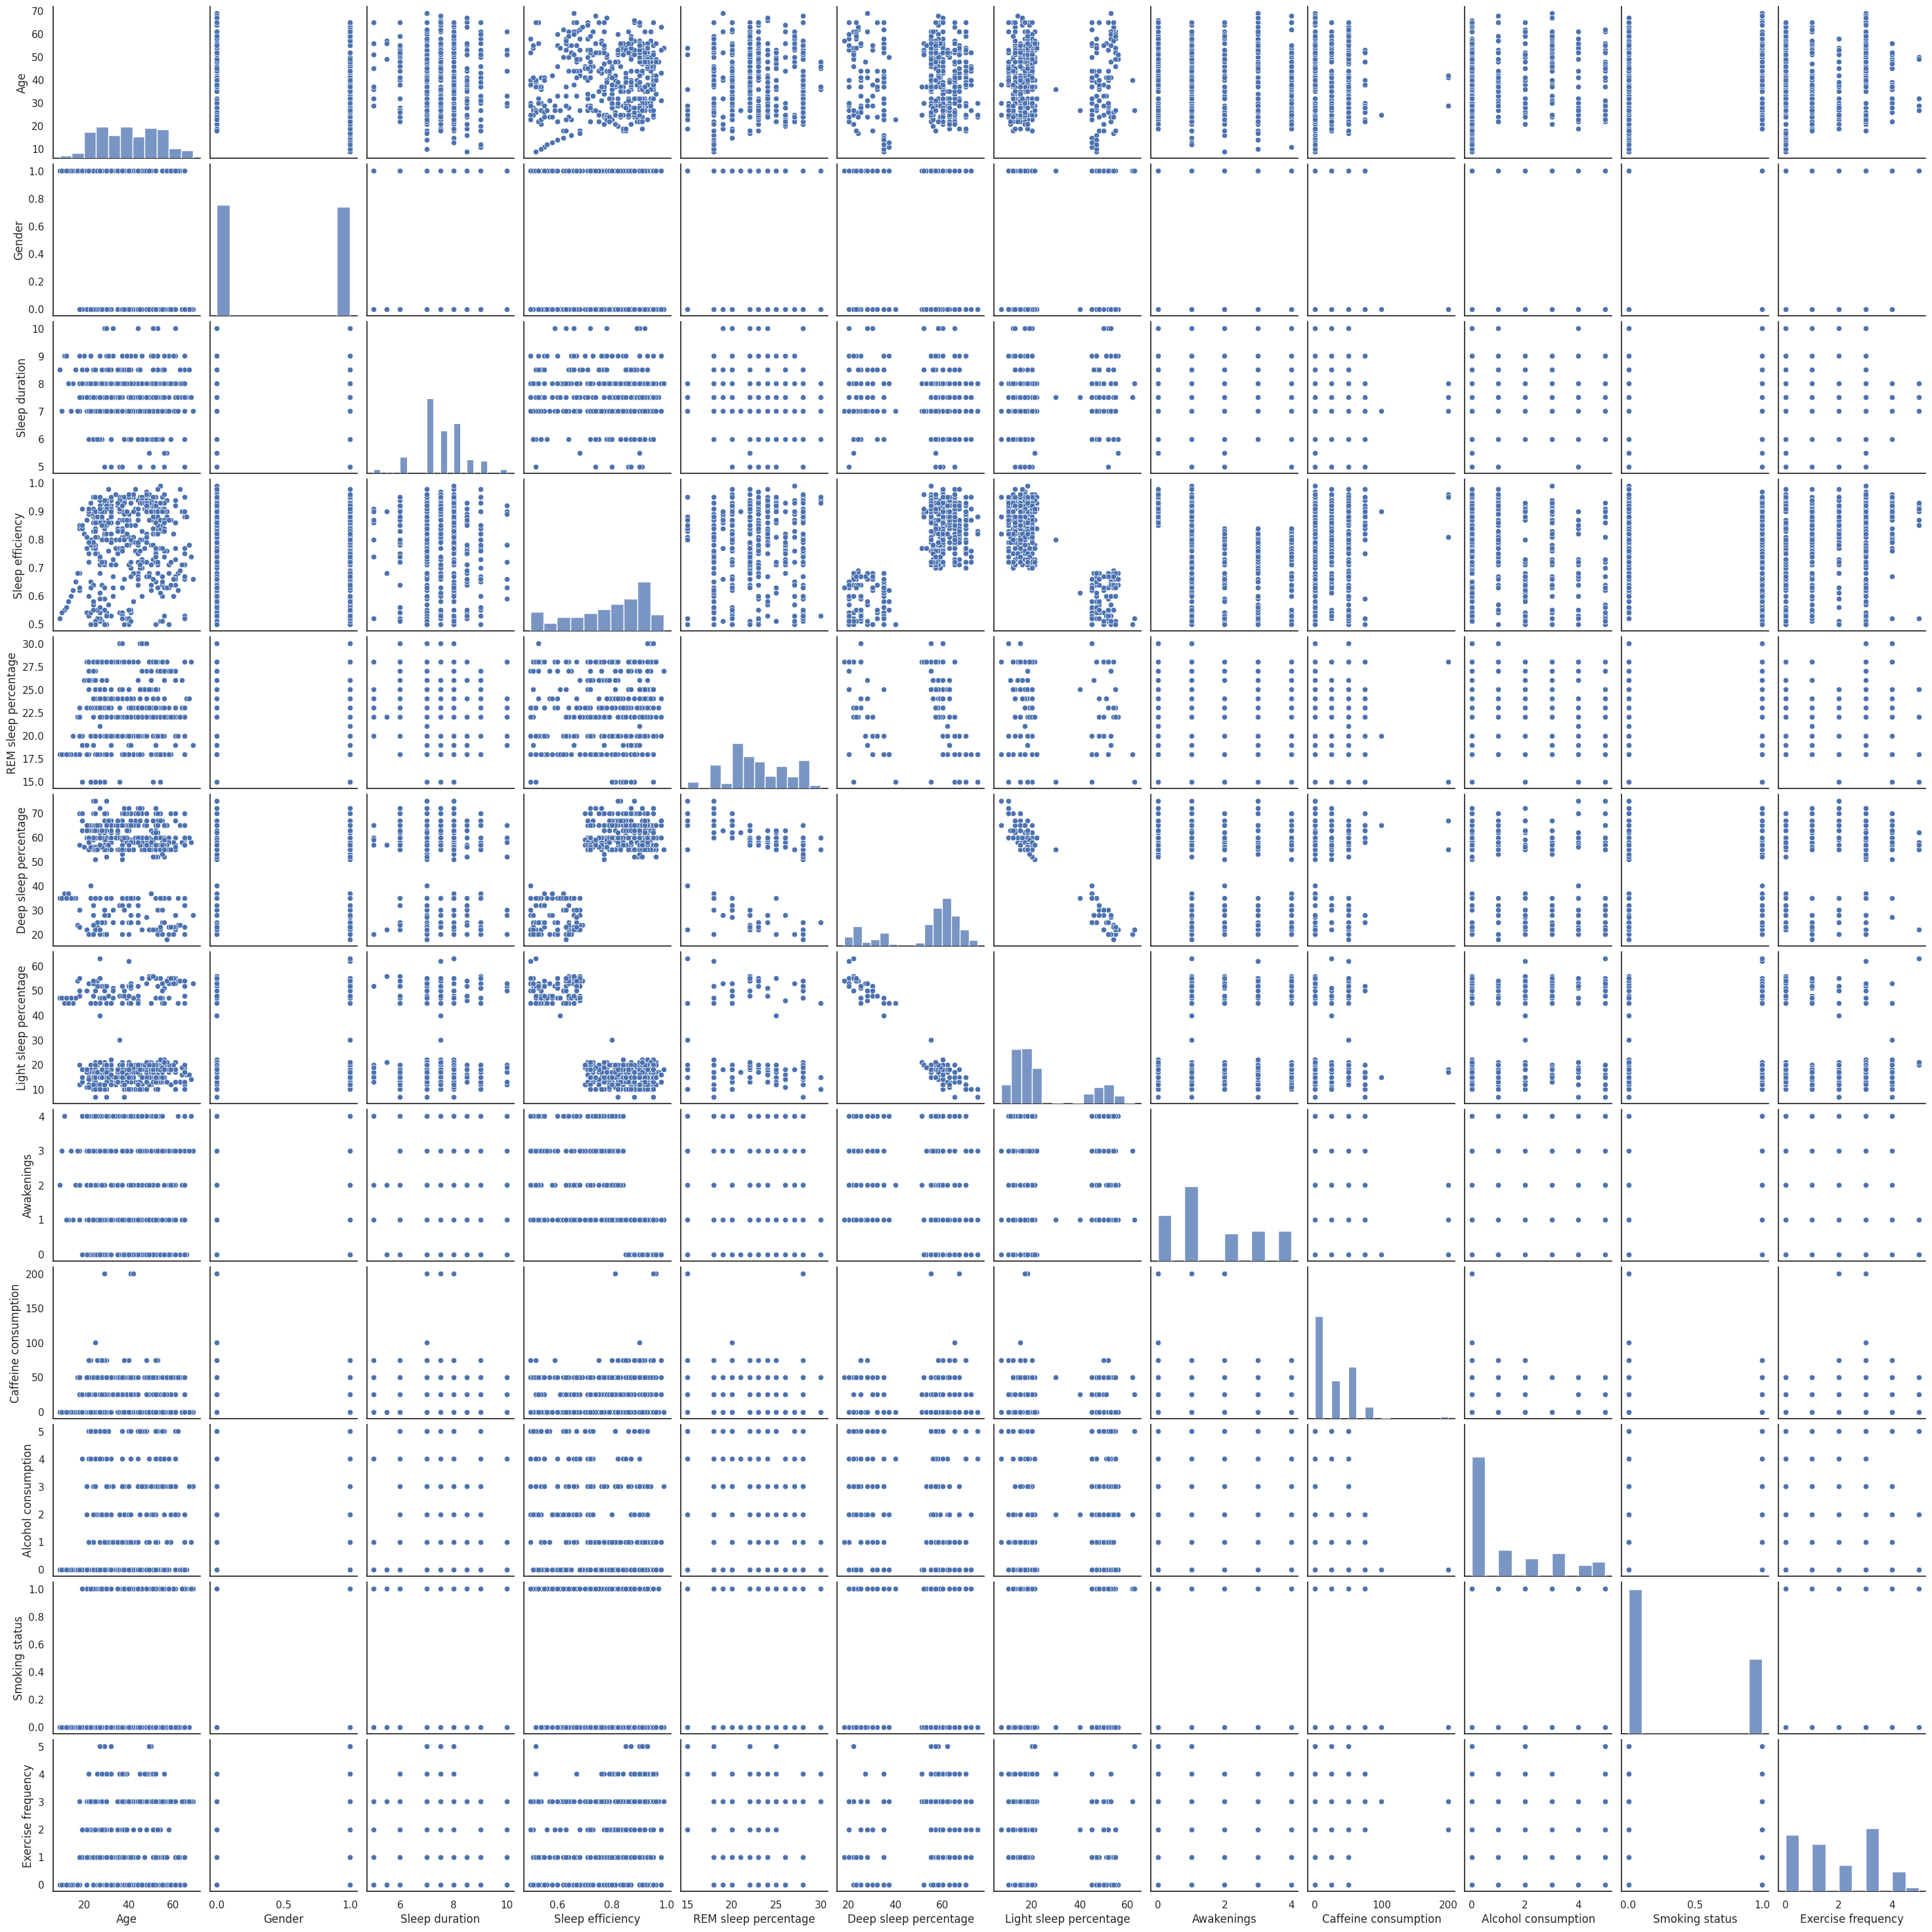

In [61]:
sns.pairplot(
    corr_data
)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Sleep duration'}>],
       [<Axes: title={'center': 'Sleep efficiency'}>,
        <Axes: title={'center': 'REM sleep percentage'}>,
        <Axes: title={'center': 'Deep sleep percentage'}>],
       [<Axes: title={'center': 'Light sleep percentage'}>,
        <Axes: title={'center': 'Awakenings'}>,
        <Axes: title={'center': 'Caffeine consumption'}>],
       [<Axes: title={'center': 'Alcohol consumption'}>,
        <Axes: title={'center': 'Smoking status'}>,
        <Axes: title={'center': 'Exercise frequency'}>]], dtype=object)

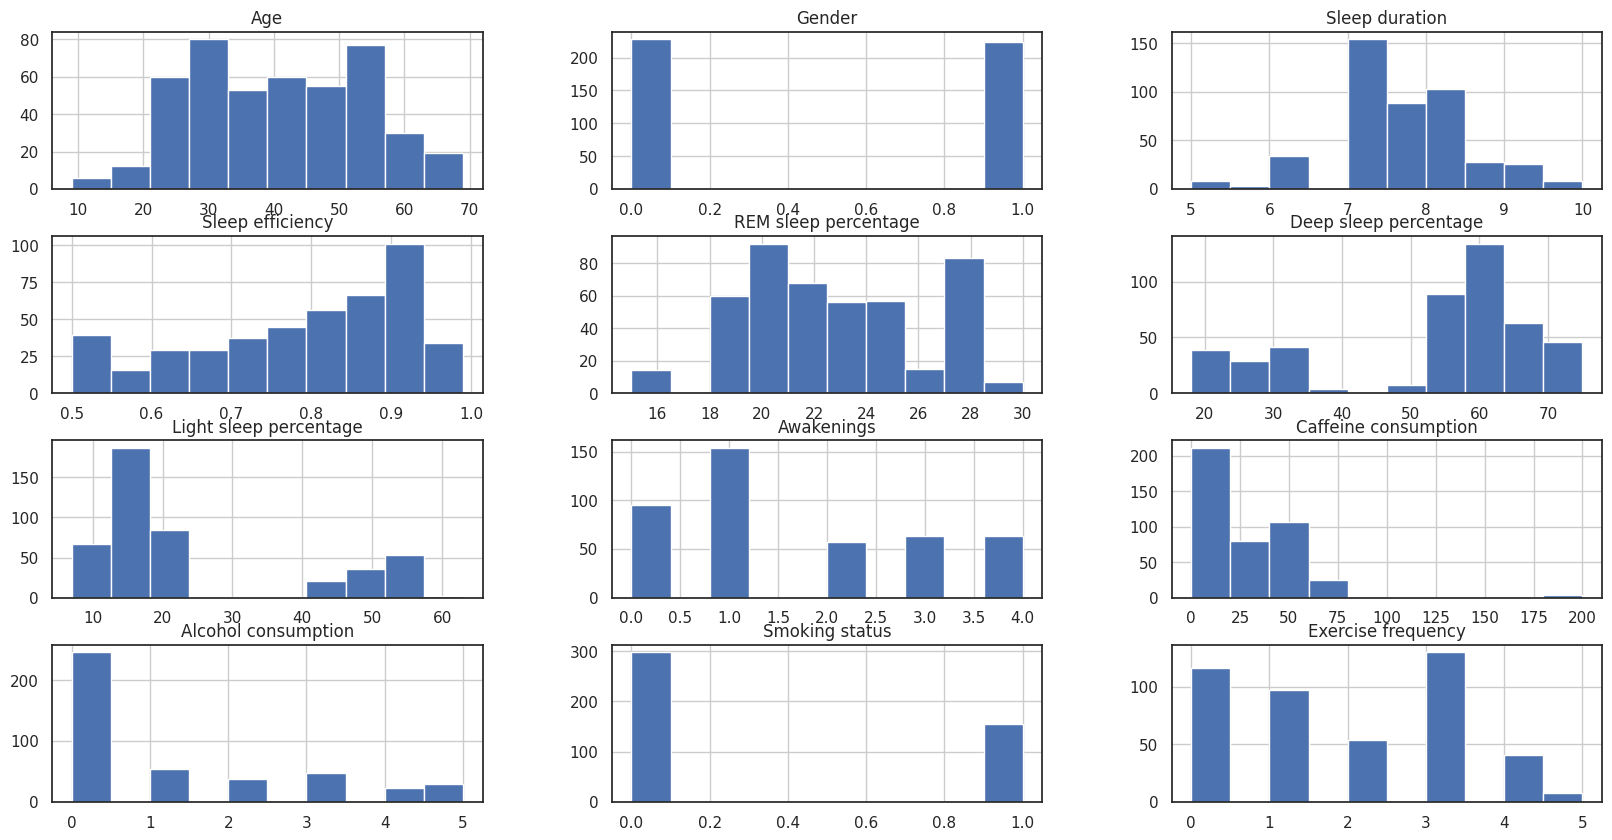

In [62]:
corr_data.hist( figsize=(20, 10))


From the above, we can say that we have a column age, the histogram plot shows how frequently each age occurs in the dataset. The x-axis shows the range of ages, and the y-axis shows the frequency of each age in the dataset.

In [63]:
 #ARE THERE ANY MISSING VALUES?
corr_data.isnull().sum()

Age                        0
Gender                     0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

**A. Yes there are some missing values in columns 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency '. We can Solve this bys using absolute mean method and fill those missing data by taking mean of the entire column and adding those data into missing fields.**


In [64]:
corr_data['Awakenings'] = corr_data['Awakenings'].fillna(corr_data['Awakenings'].mean())
corr_data['Caffeine consumption'] = corr_data['Caffeine consumption'].fillna(corr_data['Caffeine consumption'].mean())
corr_data['Alcohol consumption'] = corr_data['Alcohol consumption'].fillna(corr_data['Alcohol consumption'].mean())
corr_data['Exercise frequency'] = corr_data['Exercise frequency'].fillna(corr_data['Exercise frequency'].mean())
corr_data.isnull().sum()

Age                       0
Gender                    0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

<Figure size 800x500 with 0 Axes>

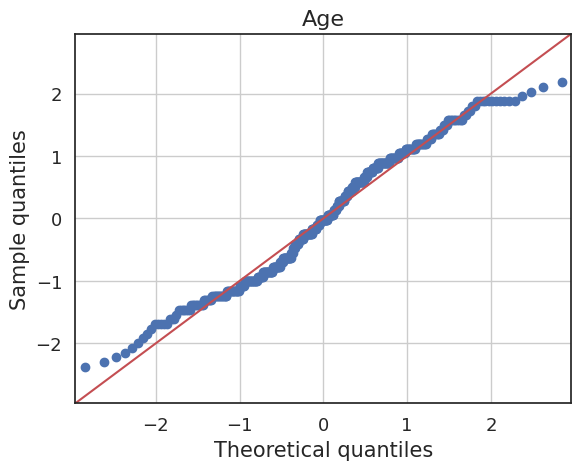

<Figure size 800x500 with 0 Axes>

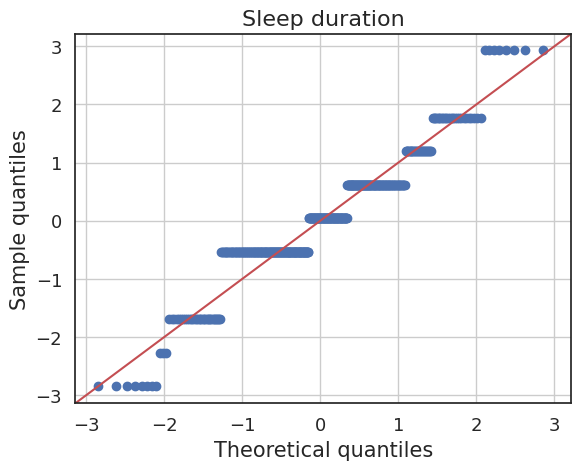

<Figure size 800x500 with 0 Axes>

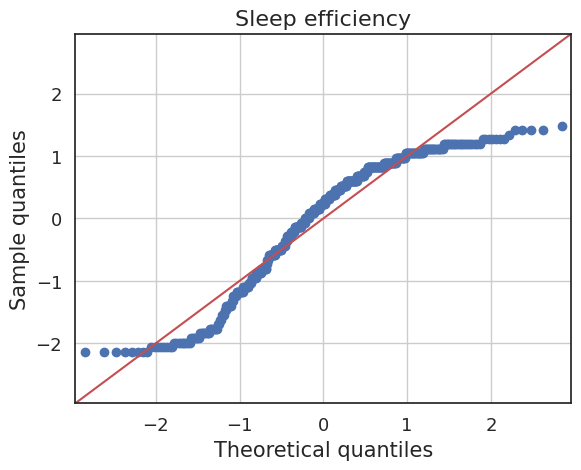

<Figure size 800x500 with 0 Axes>

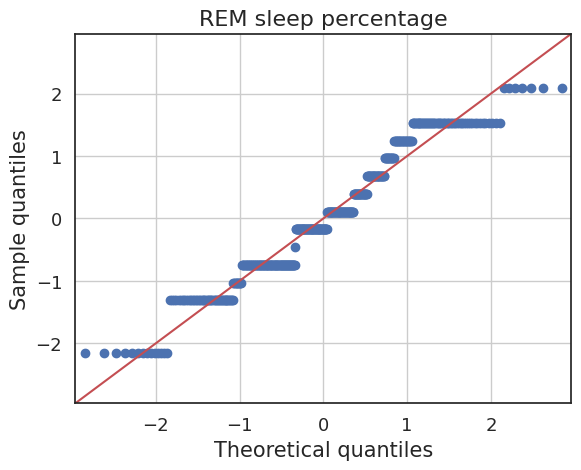

<Figure size 800x500 with 0 Axes>

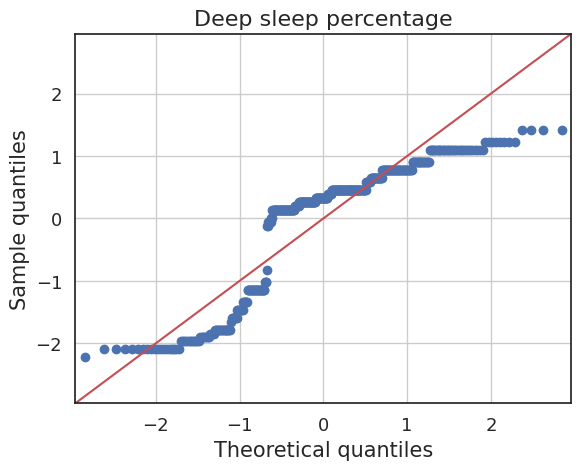

<Figure size 800x500 with 0 Axes>

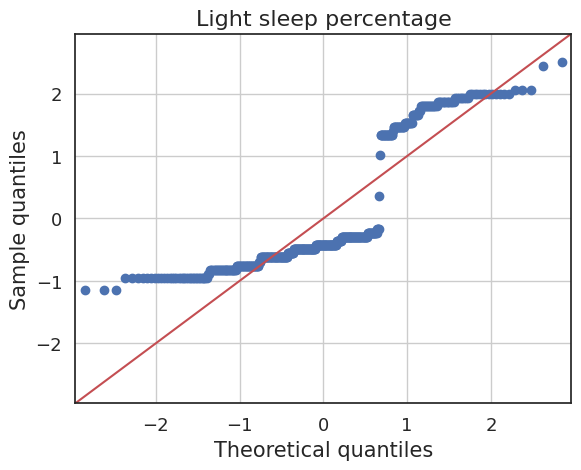

<Figure size 800x500 with 0 Axes>

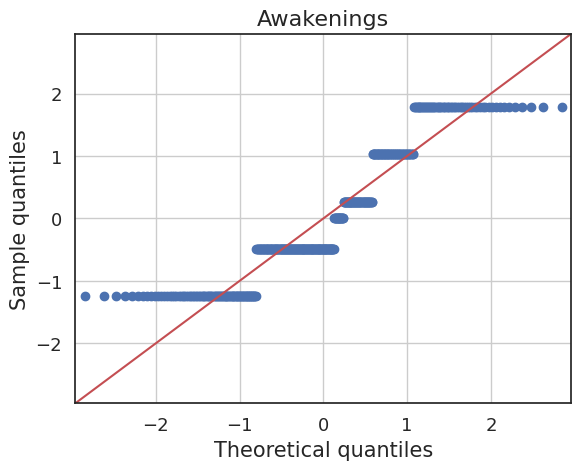

<Figure size 800x500 with 0 Axes>

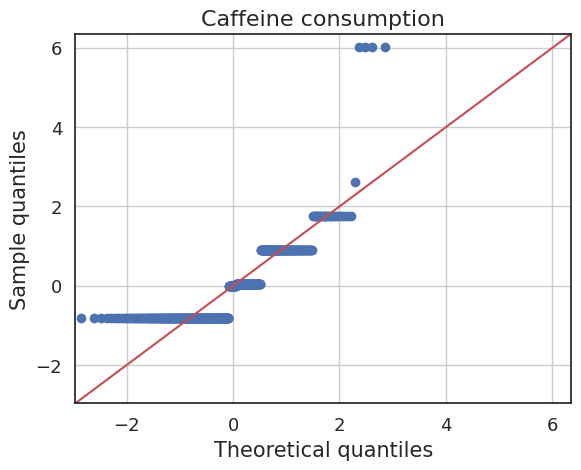

<Figure size 800x500 with 0 Axes>

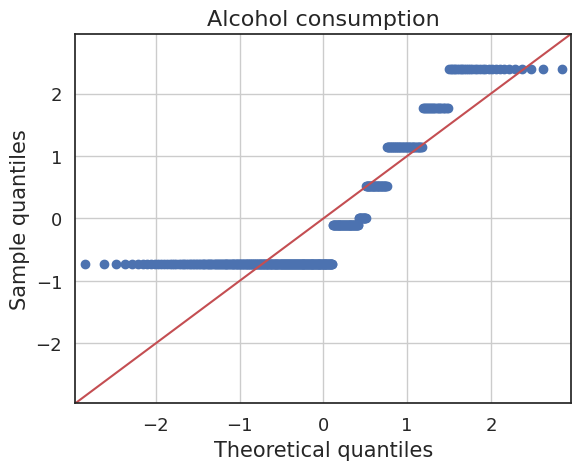

<Figure size 800x500 with 0 Axes>

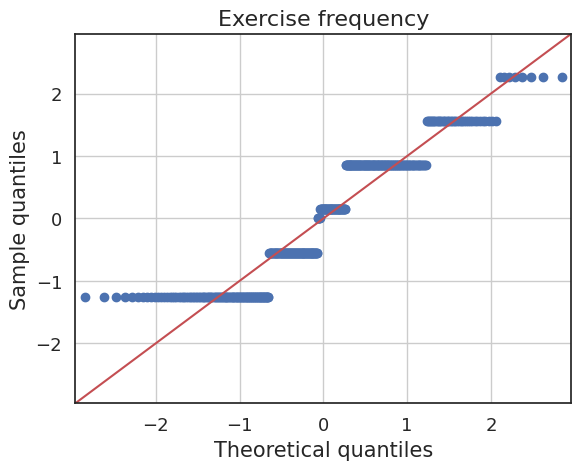

In [65]:
# From above we can observe the likely distributions of all the numeric variable
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot


# Numerical Variables are:
# 1. ID
# 2. Age
# 3. Sleep duration
# 4. Sleep efficiency
# 5. REM sleep percentage
# 6. Deep sleep percentage
# 7. Light sleep percentage
# 8. Awakenings
# 9. Caffeine consumption
# 10. Alcohol consumption
# 11. Exercise frequency
data_norm=corr_data[['Age','Sleep duration','Sleep efficiency','REM sleep percentage','Deep sleep percentage','Light sleep percentage','Awakenings','Caffeine consumption','Alcohol consumption','Exercise frequency']]


for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("{}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()


In [66]:
predictor_variables = ['Age', 'Sleep duration', 'Sleep efficiency', 'Awakenings',
                       'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']

# Creating a new DataFrame containing only the predictor variables
predictors_df = corr_data[predictor_variables]

# Computing the correlation matrix
correlation_matrix = predictors_df.corr()

# Printing the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                           Age  Sleep duration  Sleep efficiency  Awakenings  \
Age                   1.000000       -0.062462          0.098357   -0.017468   
Sleep duration       -0.062462        1.000000         -0.027467    0.004829   
Sleep efficiency      0.098357       -0.027467          1.000000   -0.554498   
Awakenings           -0.017468        0.004829         -0.554498    1.000000   
Caffeine consumption -0.168273       -0.014542          0.063121   -0.103769   
Alcohol consumption   0.046474       -0.045662         -0.383671    0.198491   
Exercise frequency    0.071892       -0.067903          0.257974   -0.212485   

                      Caffeine consumption  Alcohol consumption  \
Age                              -0.168273             0.046474   
Sleep duration                   -0.014542            -0.045662   
Sleep efficiency                  0.063121            -0.383671   
Awakenings                       -0.103769             0.198491   
Caff

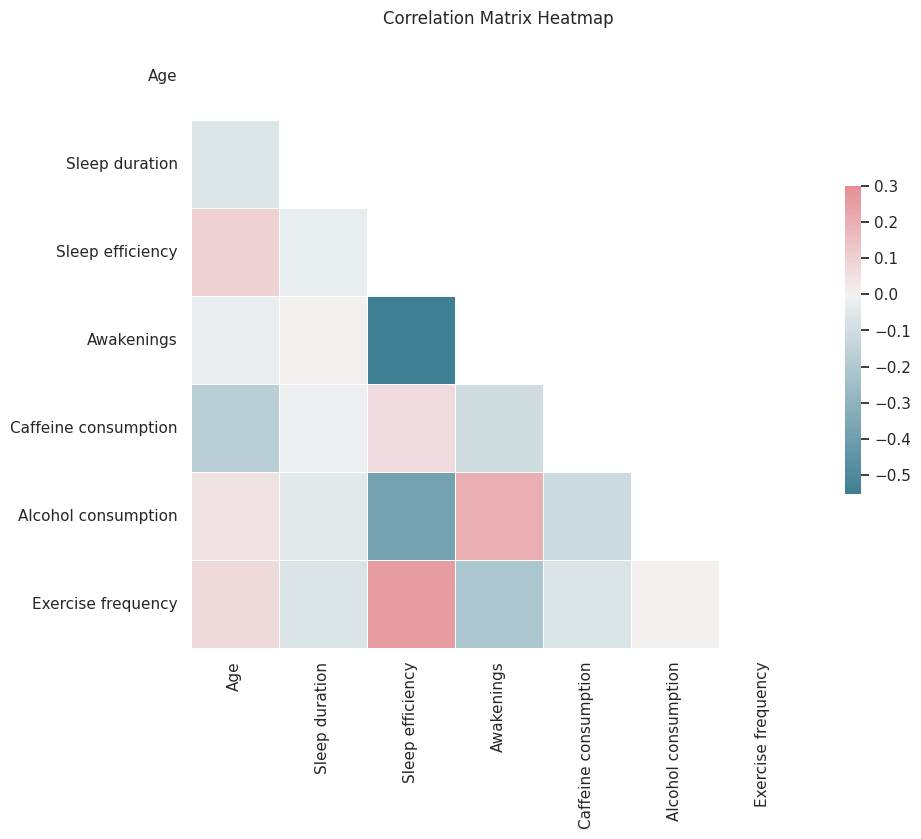

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the heatmap
sns.set(style="white")

# Create a correlation matrix
correlation_matrix = predictors_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title to the plot
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [68]:

# importing H20 automl
#H2O AutoML provides necessary data processing capabilities.
#So there is no need to create duplicates and can take care of missing value imputation and other data cleaning activities.
import h2o
from h2o.automl import H2OAutoML
import os

In [69]:
h2o.init(strict_version_check=False)
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,53 mins 55 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_lwq64n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [70]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
#min_mem_size specifies the minimum memory (in gigabytes) that should be allocated to the H2O cluster.

run_time = 222
# run_time specifies the maximum runtime (in seconds) for the AutoML algorithm to search for the best model.
# This parameter helps to limit the time the algorithm spends searching for the best model, as it can be time-consuming and resource-intensive.

In [71]:
from distutils.util import strtobool
import psutil
pct_memory = 0.5
#This line sets the percentage of available memory to use for the H2O cluster to 50% (0.5).
virtual_memory = psutil.virtual_memory()
#The above line gets information about the available system memory using the psutil.virtual_memory() function, and stores it in the virtual_memory variable.
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))

# finally dividing the available memory by the number of gigabytes in a byte (1073741824) and rounding to the nearest integer.
print(min_mem_size)

4


In [72]:
import random, os, sys
import logging


port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)
# in try: we are intializing H2O cluster
  #in except: If the H2O cluster initialization fails
  # (for example, if the specified port is already in use), the code logs a critical error using the logging.critical() function,
  #  downloads all logs using h2o.download_all_logs() function and then shuts down the H2O cluster using h2o.cluster().shutdown().
  #  Finally, the code exits with a status code of 2 using the sys.exit(2) function.

Checking whether there is an H2O instance running at http://localhost:33341..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5ejhmbg0
  JVM stdout: /tmp/tmp5ejhmbg0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp5ejhmbg0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:33341
Connecting to H2O server at http://127.0.0.1:33341 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_m3ofah
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [73]:

data = h2o.import_file('https://raw.githubusercontent.com/sarthaksomvanshi10/ML-Data-Cleaning-and-Feature-Selection/main/Sleep_Efficiency.csv')
data = data.na_omit()

data



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
1,65,Female,06-03-2021 01:00,06-03-2021 07:00,6,0.88,18,70,12,0,0,0,Yes,3
2,69,Male,05-12-2021 02:00,05-12-2021 09:00,7,0.66,19,28,53,3,0,3,Yes,3
3,40,Female,25-05-2021 21:30,25-05-2021 05:30,8,0.89,20,70,10,1,0,0,No,3
4,40,Female,03-11-2021 02:30,03-11-2021 08:30,6,0.51,23,25,52,3,50,5,Yes,1
5,57,Male,13-03-2021 01:00,13-03-2021 09:00,8,0.76,27,55,18,3,0,3,No,3
7,27,Female,21-07-2021 21:00,21-07-2021 03:00,6,0.54,28,25,47,2,50,0,Yes,1
8,53,Male,16-08-2021 00:30,16-08-2021 10:30,10,0.9,28,52,20,0,50,0,Yes,3
9,41,Female,05-04-2021 02:30,05-04-2021 08:30,6,0.79,28,55,17,3,50,0,No,1
10,11,Female,16-09-2021 01:00,16-09-2021 10:00,9,0.55,18,37,45,4,0,0,No,0
11,50,Male,28-02-2021 00:30,28-02-2021 08:30,8,0.92,23,57,20,1,50,0,Yes,3


In [74]:
missing_values = data.isna().sum()
print(missing_values)

0.0


In [75]:
data_types = data.types
data_types


{'ID': 'int',
 'Age': 'int',
 'Gender': 'enum',
 'Bedtime': 'enum',
 'Wakeup time': 'string',
 'Sleep duration': 'real',
 'Sleep efficiency': 'real',
 'REM sleep percentage': 'int',
 'Deep sleep percentage': 'int',
 'Light sleep percentage': 'int',
 'Awakenings': 'int',
 'Caffeine consumption': 'int',
 'Alcohol consumption': 'int',
 'Smoking status': 'enum',
 'Exercise frequency': 'int'}

In [76]:
data.shape


(388, 15)

In [77]:

data.describe(chunk_summary=True)
# The "chunk_summary=True" parameter tells H2O.ai to display a summary of each chunk of data, as well as a summary of the entire dataset.



Rows:388
Cols:15

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size    size_percentage
------------  -------------------------  -------  ------------------  ------  -----------------
CBS           Binary                     2        13.3333             238  B  1.4902
C1N           1-Byte Integers (w/o NAs)  8        53.3333             3.6 KB  22.8414
C2            2-Byte Integers            2        13.3333             1.6 KB  10.5692
CStr          Strings                    1        6.66667             8.0 KB  51.4746
CUD           Unique Reals               2        13.3333             2.1 KB  13.6247

Frame distribution summary: 
                 size     number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  -------  ----------------  -----------------------------  ------------------
127.0.0.1:33341  15.6 KB  388               1                              15
mean             15.6 KB  388               1                              15
min              15.6 KB  388               1                              15
max              15.6 KB  388               1                              15
stddev           0  B     0                 0                              0
total            15.6 KB  388               1                              15

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
type,int,int,enum,enum,string,real,real,int,int,int,int,int,int,enum,int
mins,1.0,9.0,,,NaN,5.0,0.5,15.0,18.0,7.0,0.0,0.0,0.0,,0.0
mean,226.26030927835063,40.829896907216515,,,NaN,7.451030927835051,0.7892525773195871,22.68041237113402,52.822164948453604,24.497422680412352,1.618556701030928,22.680412371134008,1.1469072164948448,,1.7577319587628861
maxs,452.0,69.0,,,NaN,10.0,0.99,30.0,75.0,63.0,4.0,200.0,5.0,,5.0
sigma,129.57811396814796,13.403186515708645,,,NaN,0.8834826371244822,0.13570643235106417,3.430510291939431,15.571517875412727,15.309637691995059,1.3559576569050091,28.99756610716816,1.6127930806785904,,1.4478236399193563
zeros,0,0,,,0,0,0,0,0,0,87,195,221,,110
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,65.0,Female,06-03-2021 01:00,06-03-2021 07:00,6.0,0.88,18.0,70.0,12.0,0.0,0.0,0.0,Yes,3.0
1,2.0,69.0,Male,05-12-2021 02:00,05-12-2021 09:00,7.0,0.66,19.0,28.0,53.0,3.0,0.0,3.0,Yes,3.0
2,3.0,40.0,Female,25-05-2021 21:30,25-05-2021 05:30,8.0,0.89,20.0,70.0,10.0,1.0,0.0,0.0,No,3.0




1.   **Frame distribution summary** section provides information about the distribution of the data across the available nodes in the H2O cluster.

2.   **Column type frequency summary** section shows the frequency of each column type in the dataset, which can be helpful for understanding the data types and formats of the columns in the dataset.



In [78]:
# List of columns to drop
columns_to_drop = ["ID", "Bedtime", "Wakeup time"]

# Drop multiple columns
data = data.drop(columns_to_drop)

In [79]:

# Create a 90/10 train/test split
pct_rows=0.90
data_train, data_test = data.split_frame([pct_rows])


In [80]:
#Display all columns in X
X=data.columns
print(X)

['Age', 'Gender', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']


In [81]:
#Seperate Dependent variable from Independent variable
y_numeric ='Smoking status'
X.remove(y_numeric)
print(X)


['Age', 'Gender', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']


**TRAINING AUTOML MODELS**

In [82]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [83]:
aml.train(x=X, y=y_numeric, training_frame=data_train)  # Trainig the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),0/1
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [84]:

#Creates the leader Board for all out models, ranking them by their performance(default: mean_per_class_error	)
#We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well.
#Here from the leaderboard we have "GBM_5_AutoML_1_20221107_231030	" as the leader(best performing) model .
lb = aml.leaderboard

In [85]:
lb.head()


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_223814,0.853588,0.420827,0.804953,0.225059,0.368507,0.135797
StackedEnsemble_AllModels_4_AutoML_1_20240219_223814,0.846046,0.440893,0.799346,0.221773,0.375258,0.140818
StackedEnsemble_AllModels_3_AutoML_1_20240219_223814,0.844825,0.442293,0.795366,0.223766,0.376495,0.141749
GBM_5_AutoML_1_20240219_223814,0.844412,0.432735,0.792868,0.234307,0.374022,0.139893
GBM_grid_1_AutoML_1_20240219_223814_model_8,0.842347,0.443934,0.793198,0.219062,0.37144,0.137968
StackedEnsemble_AllModels_2_AutoML_1_20240219_223814,0.839905,0.436632,0.792728,0.225831,0.374896,0.140547
GBM_grid_1_AutoML_1_20240219_223814_model_13,0.838433,0.457372,0.778911,0.230105,0.384125,0.147552
StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_223814,0.837607,0.437007,0.793394,0.221702,0.3743,0.1401
DRF_1_AutoML_1_20240219_223814,0.834375,0.448268,0.79926,0.227394,0.376047,0.141412
GBM_grid_1_AutoML_1_20240219_223814_model_2,0.833764,0.439813,0.778604,0.245134,0.37817,0.143013


In [86]:
all_predictions = aml.leader.predict(data_test)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [87]:
all_predictions.head(15)


predict,No,Yes
Yes,0.425228,0.574772
No,0.837967,0.162033
No,0.862863,0.137137
No,0.947967,0.0520326
No,0.867721,0.132279
No,0.730514,0.269486
Yes,0.27904,0.72096
No,0.619495,0.380505
No,0.704333,0.295667
Yes,0.455115,0.544885


In [88]:
leaderboard = print(
    aml.leaderboard
)


model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_223814  0.853588   0.420827  0.804953                0.225059  0.368507  0.135797
StackedEnsemble_AllModels_4_AutoML_1_20240219_223814     0.846046   0.440893  0.799346                0.221773  0.375258  0.140818
StackedEnsemble_AllModels_3_AutoML_1_20240219_223814     0.844825   0.442293  0.795366                0.223766  0.376495  0.141749
GBM_5_AutoML_1_20240219_223814                           0.844412   0.432735  0.792868                0.234307  0.374022  0.139893
GBM_grid_1_AutoML_1_20240219_223814_model_8              0.842347   0.443934  0.793198                0.219062  0.37144   0.137968
StackedEnsemble_AllModels_2_AutoML_1_20240219_223814     0.839905   0.436632  0.792728                0.225831  0.374896  0.140547
GBM_grid_1_AutoML_1_20240219_223814_model_13             0.838433   0.457372  0.778

## **Explanation:**
The table provides performance metrics for various models trained by AutoML, which includes:

A Stacked Ensemble model using all available models

A Stacked Ensemble model using the best performing models from each family

A Gradient Boosting Machine (GBM) model with ID 1

Another GBM model with ID 2

A GBM model with ID 4

An XGBoost model with ID 1

Another GBM model with ID 3

An XGBoost model with ID 2

A Generalized Linear Model (GLM) model with ID 1

The performance metrics reported for each model are:

AUC (Area Under the ROC Curve): A measure of how well the model can distinguish between positive and negative samples.

Log Loss: A measure of the model's error, where lower values indicate better performance.

AUCPR (Area Under the Precision-Recall Curve): A measure of the trade-off between precision and recall for different threshold values.

Mean Per-Class Error: The average error rate across all classes.

RMSE (Root Mean Squared Error): A measure of the model's error, where lower values indicate better performance.

MSE (Mean Squared Error): Another measure of the model's error, where lower values indicate better performance.

Based on the table, the Stacked Ensemble model using all available models achieved the highest AUC and AUCPR scores, indicating that it performed the best overall.

 However, the difference in performance between this model and the Stacked Ensemble model using the best performing models from each family was relatively small.

  The GLM model had the lowest AUC and AUCPR scores, indicating that it performed the worst overall.






In [89]:
print(aml.leader)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_223814


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       3/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       0/1
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.04132363665272885
RMSE: 0.20328216019299097
LogLoss: 0.1849477453739742
AUC: 0.999784529

In [90]:
best_model = aml.leader
best_model.model_performance(data_test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.12216840308332737
RMSE: 0.3495259691114916
LogLoss: 0.38417426899355817
AUC: 0.9353741496598639
AUCPR: 0.9201218473373886
Gini: 0.8707482993197277
Null degrees of freedom: 34
Residual degrees of freedom: 31
Null deviance: 47.71381933318447
Residual deviance: 26.89219882954907
AIC: 34.89219882954907

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2694856945263774
       No    Yes    Error    Rate
-----  ----  -----  -------  ----------
No     18    3      0.1429   (3.0/21.0)
Yes    1     13     0.0714   (1.0/14.0)
Total  19    16     0.1143   (4.0/35.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.269486     0.866667  15
max f2                       0.269486     0.902778  15
max f0point5                 0.544885     0.9       8
max accuracy                 0.269486     0.885714  15
max precision                0.996333     1         0
max recall                   0.175722     1         22
max specificity              0.996333     1         0
max absolute_mcc             0.269486     0.772683  15
max min_per_class_accuracy   0.295667     0.857143  14
max mean_per_class_accuracy  0.269486     0.892857  15
max tns                      0.996333     21        0
max fns                      0.996333     13        0
max fps                      0.018454     21        34
max tps                      0.175722     14        22
max tnr                      0.996333     1         0
max fnr                      0.996333     0.928571  0
max fpr                      0.018454     1         34
max tpr                      0.175722     1         22

Gains/Lift Table: Avg response rate: 40.00 %, avg score: 34.76 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0285714                   0.983039           2.5       2.5                1                0.996333   1                           0.996333            0.0714286       0.0714286                  150       150                0.0714286
2        0.0285714                   0.969745           0         2.5                0                0          1                           0.996333            0               0.0714286                  -100      150                0.0714286
3        0.0571429                   0.957094           2.5       2.5                1                0.957233   1                           0.976783            0.0714286       0.142857                   150       150                0.142857
4        0.0571429                   0.954739           0         2.5                0                0          1                           0.976783            0               0.142857                   -100      150                0.142857
5        0.0571429                   0.952384           0         2.5                0                0          1                           0.976783            0               0.142857                   -100      150                0.142857
6        0.114286                    0.74738            2.5       2.5                1                0.857649   1                           0.917216            0.142857        0.285714                   150       150                0.285714
7        0.171429                    0.604915           2.5       2.5                1                0.663007   1                           0.83248             0.1428

Here, he AUC value of 0.9043478260869565 indicates that the model is able to distinguish between the positive and negative classes quite well. The confusion matrix shows that the model has a low error rate for the negative class (no), but a higher error rate for the positive class (yes).
So, the confusion matrix shows the number of true positive, true negative, false positive and false negative predictions made by the model. It also shows the error rate for each prediction made. The table also shows the maximum value of each evaluation metric and its corresponding threshold value.

The Gains/Lift Table is a measure of how much better the model is performing compared to a random model. It shows the response rate and score of the model as well as the cumulative response rate and score at different thresholds. The table also shows the lift and gain values of the model.

In [91]:
# Getting the name of the best model
best_model_name = best_model.model_id

# Print the name of the best model
print("The best model is:", best_model_name)


The best model is: StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_223814


**Explanation**: The top three models on the leaderboard differ in their approach to making predictions. The first two models are ensemble models, which combine multiple models, while the third model is a GBM which is a Gradient Boosting Method.

 Ensembles, particularly stacked ensembles, tend to perform better than single models as they use a combination of models to make predictions.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

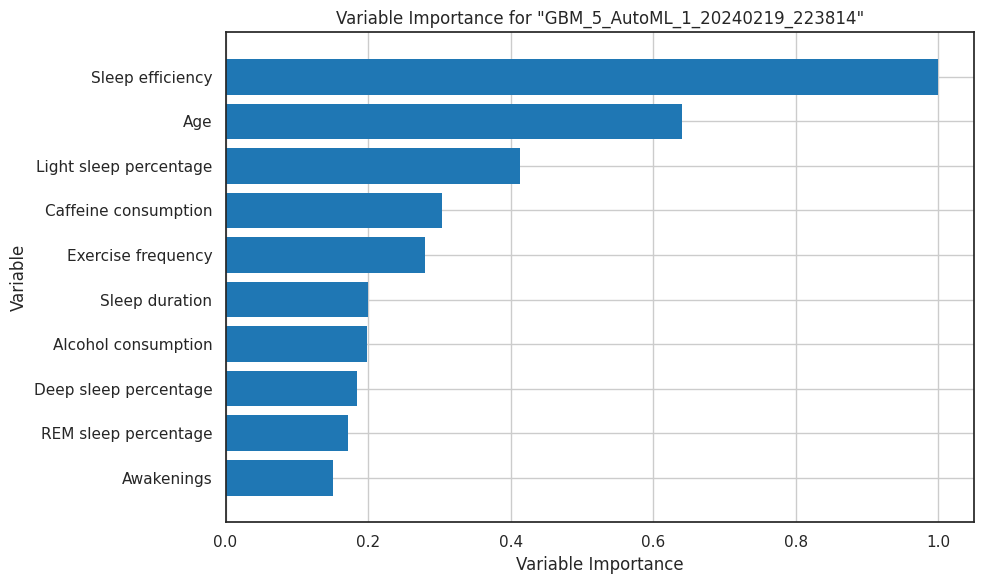

In [92]:
best_mod = aml.explain(frame = data_test, figsize = (10,6),include_explanations=['varimp'])
#referred this line of code to find the variable importance from the notebook provided


The above graph shows the variable importance of the top third best model because the first (i.e., stackedensemble) does not have a variable importance plot.

In [93]:
%matplotlib inline
best_model.varimp()

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_5_AutoML_1_20240219_223814,0.955782,0.344838,0.938541,0.0952381,0.329205,0.108376,227,0.169271,GBM
GBM_grid_1_AutoML_1_20240219_223814_model_21,0.952381,0.395422,0.920753,0.0952381,0.368588,0.135857,151,0.146828,GBM
GBM_grid_1_AutoML_1_20240219_223814_model_13,0.952381,0.376961,0.925745,0.0833333,0.354834,0.125907,276,0.160392,GBM
GBM_grid_1_AutoML_1_20240219_223814_model_12,0.942177,0.362518,0.925217,0.119048,0.343815,0.118209,119,0.167784,GBM
XGBoost_grid_1_AutoML_1_20240219_223814_model_8,0.942177,0.33301,0.91038,0.107143,0.341258,0.116457,450,0.150601,XGBoost
StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_223814,0.938776,0.359668,0.91849,0.119048,0.339101,0.11499,440,0.280923,StackedEnsemble
DRF_1_AutoML_1_20240219_223814,0.935374,0.377751,0.924117,0.119048,0.34995,0.122465,206,0.157908,DRF
StackedEnsemble_AllModels_2_AutoML_1_20240219_223814,0.935374,0.362069,0.914293,0.142857,0.341329,0.116505,575,0.734161,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_223814,0.935374,0.384174,0.920122,0.107143,0.349526,0.122168,562,0.267444,StackedEnsemble
GBM_grid_1_AutoML_1_20240219_223814_model_8,0.928571,0.366764,0.921254,0.130952,0.33688,0.113488,199,0.156444,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_223814

,No,Yes,Error,Rate
No,18.0,3.0,0.1429,(3.0/21.0)
Yes,1.0,13.0,0.0714,(1.0/14.0)
Total,19.0,16.0,0.1143,(4.0/35.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

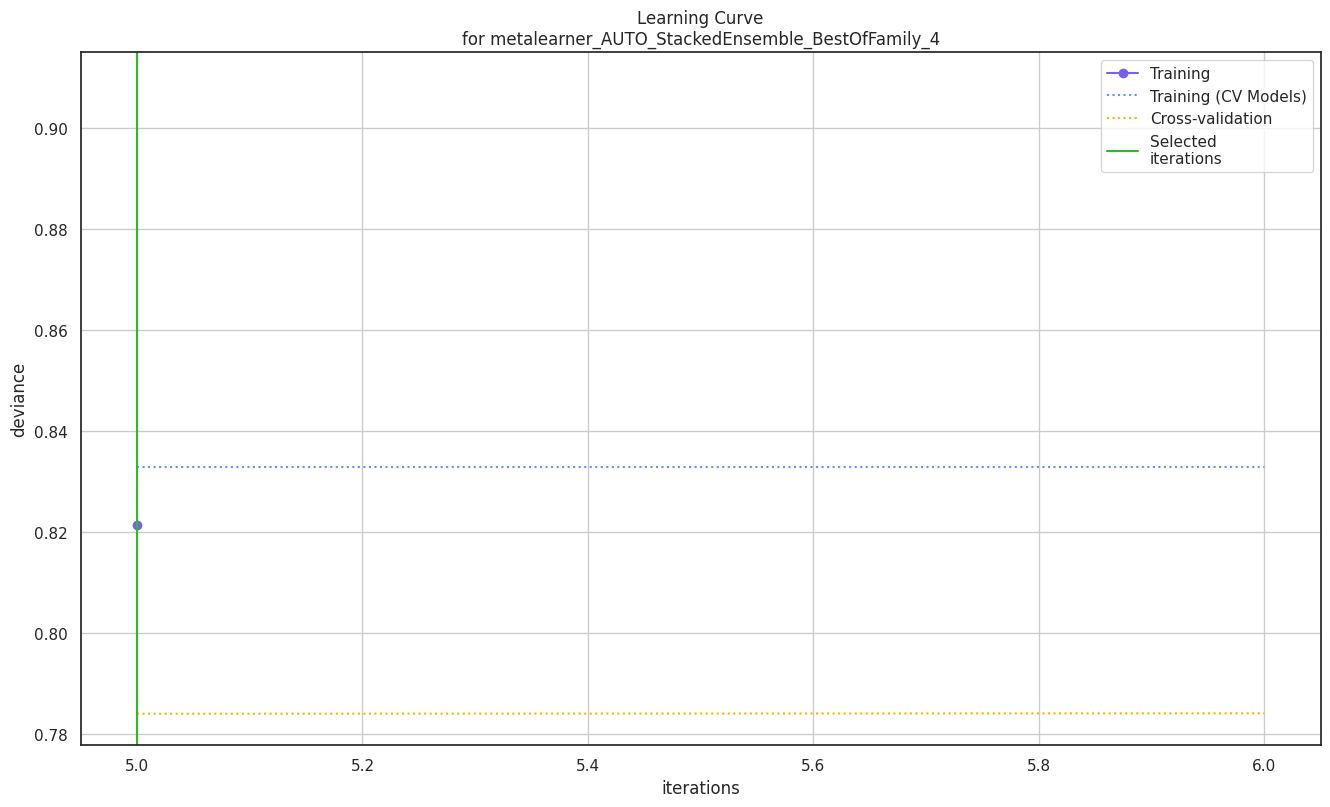

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

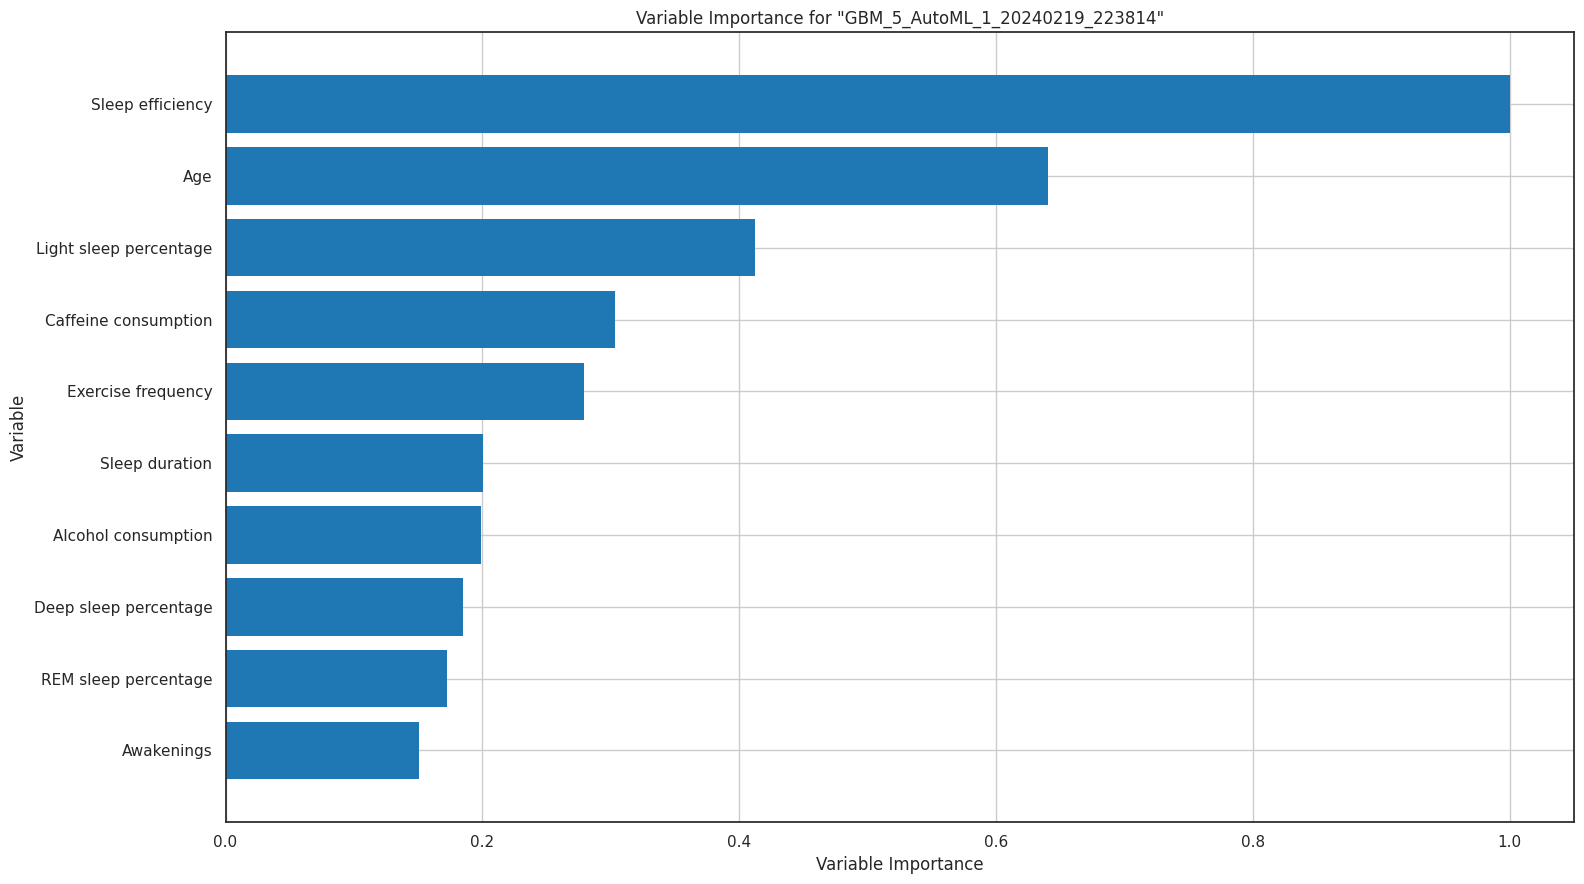

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

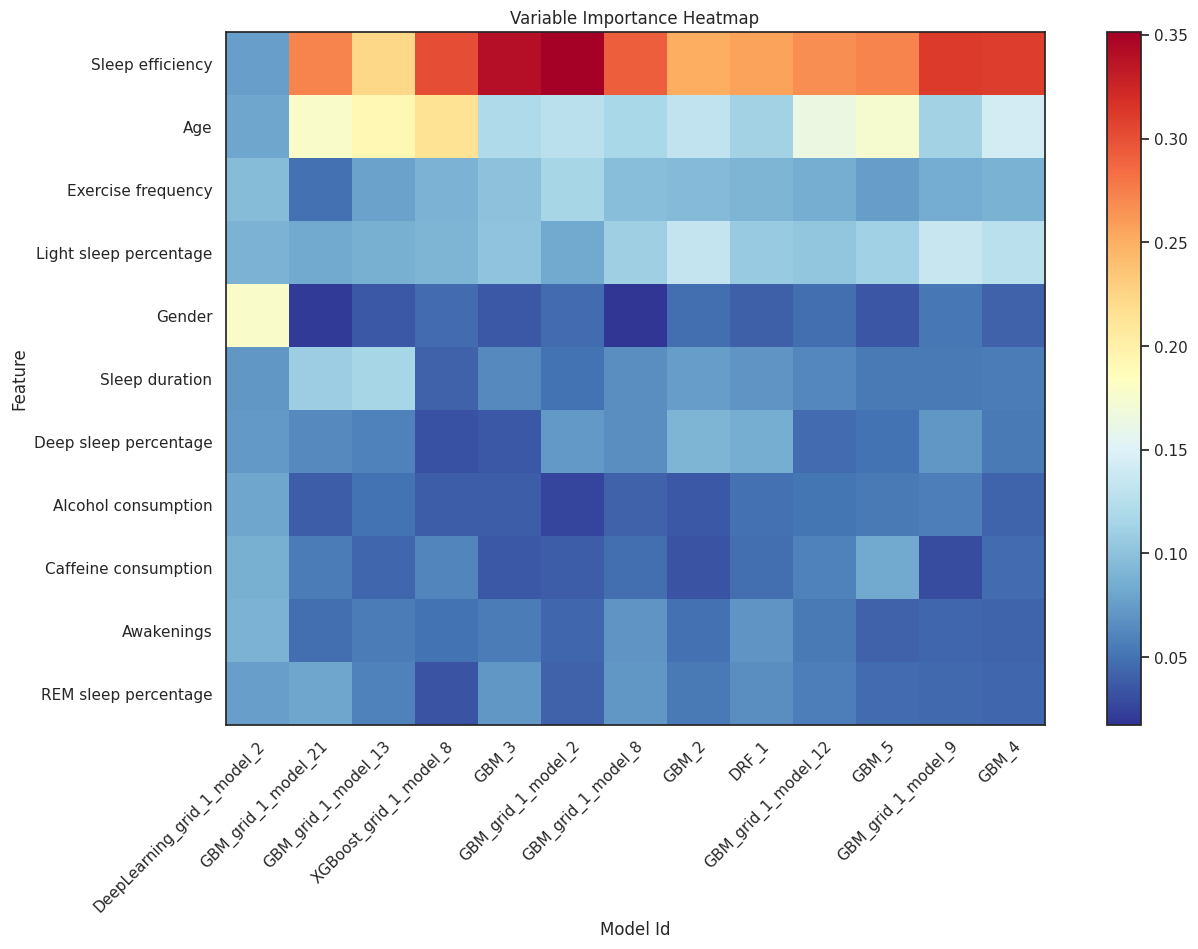

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

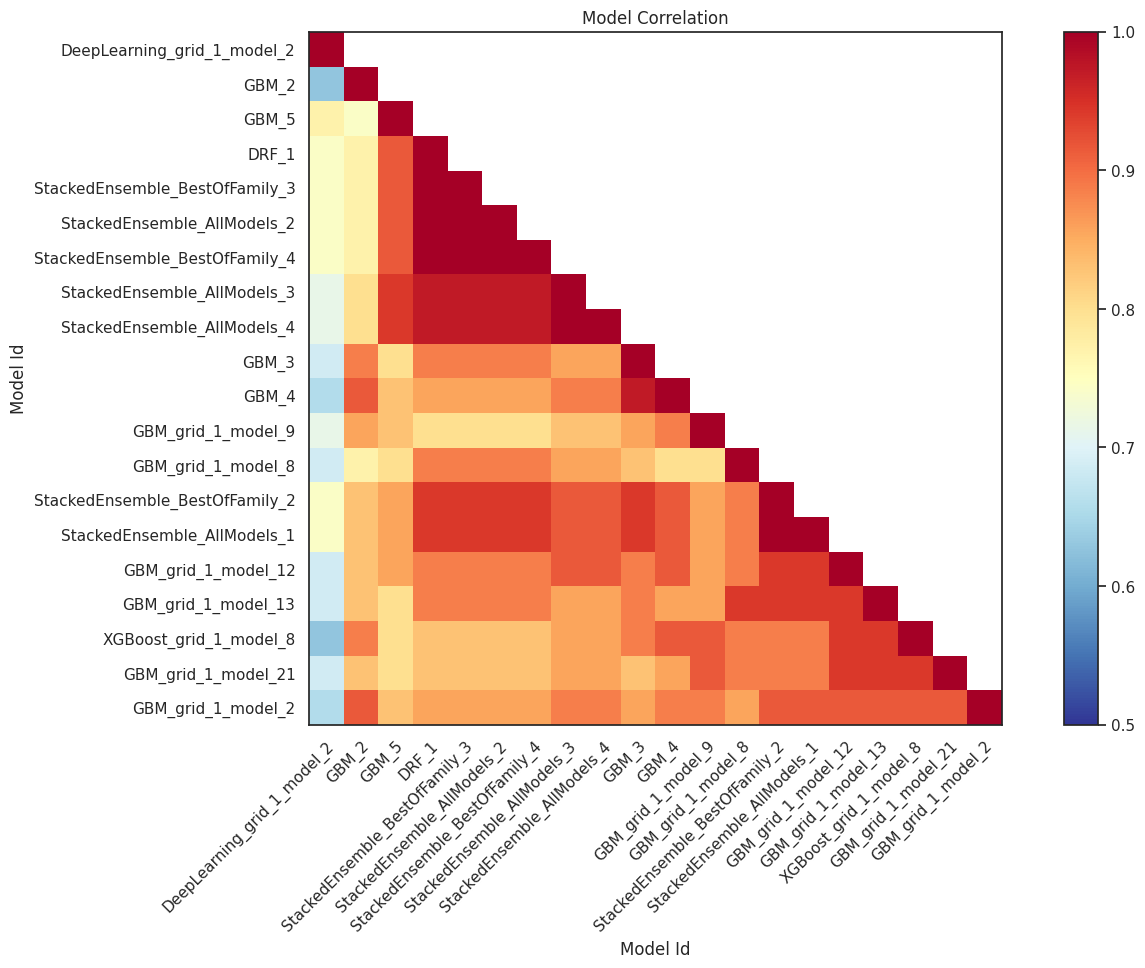

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

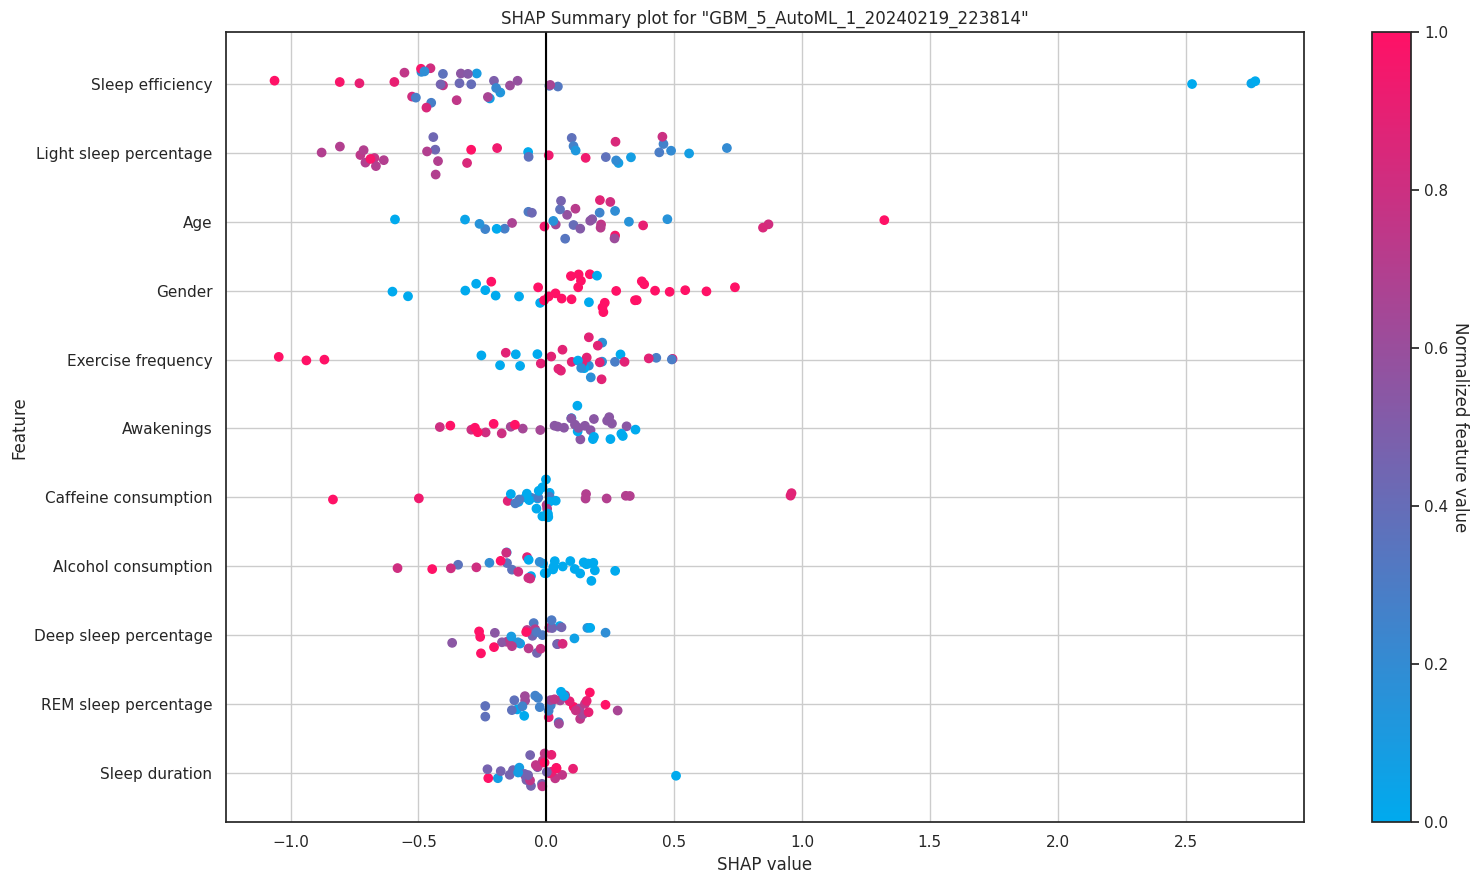

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

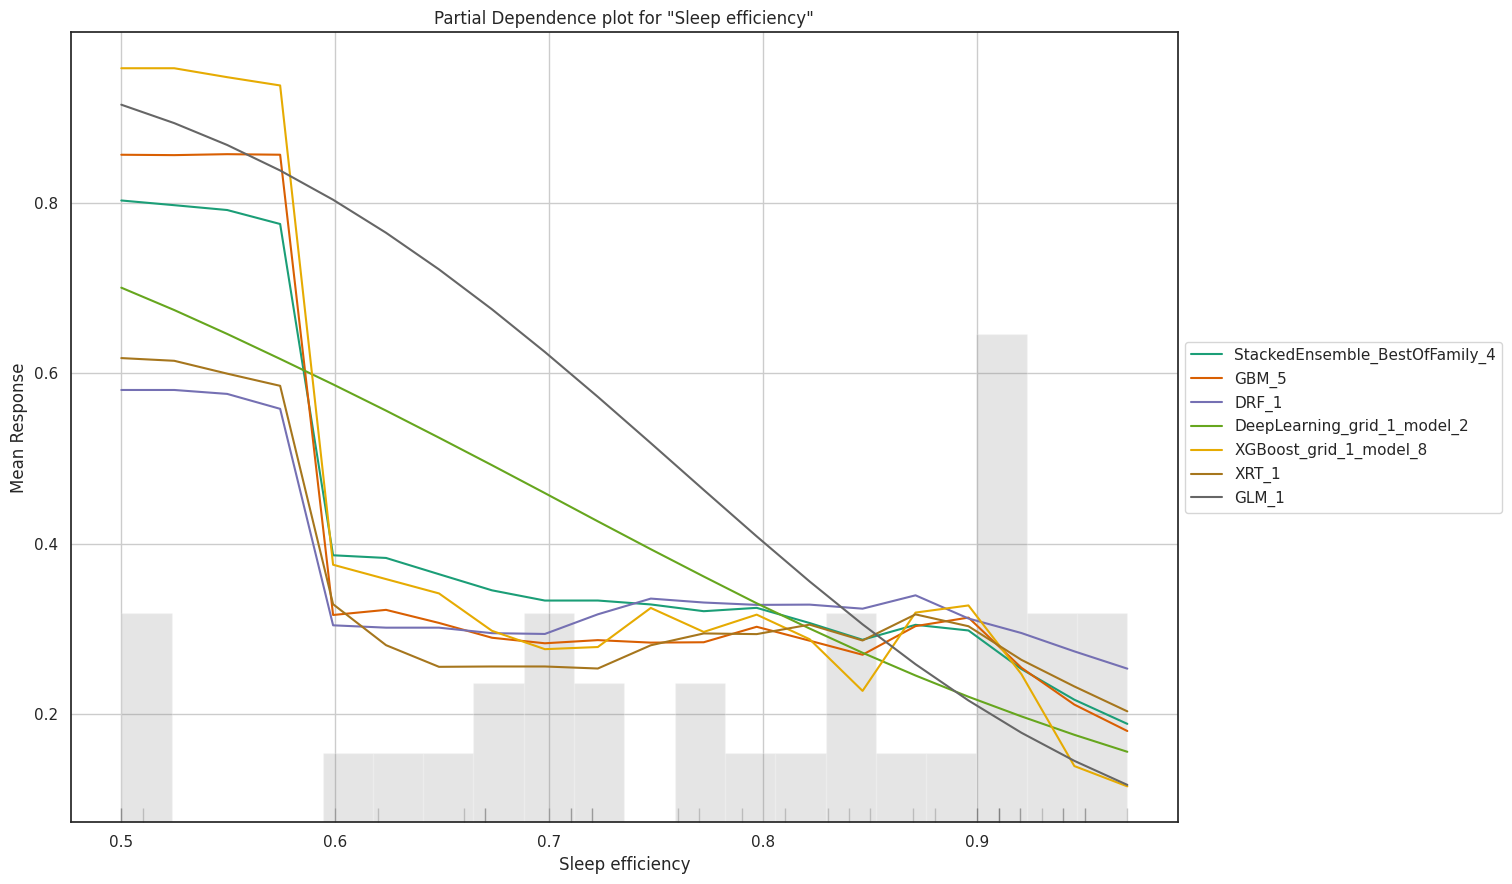

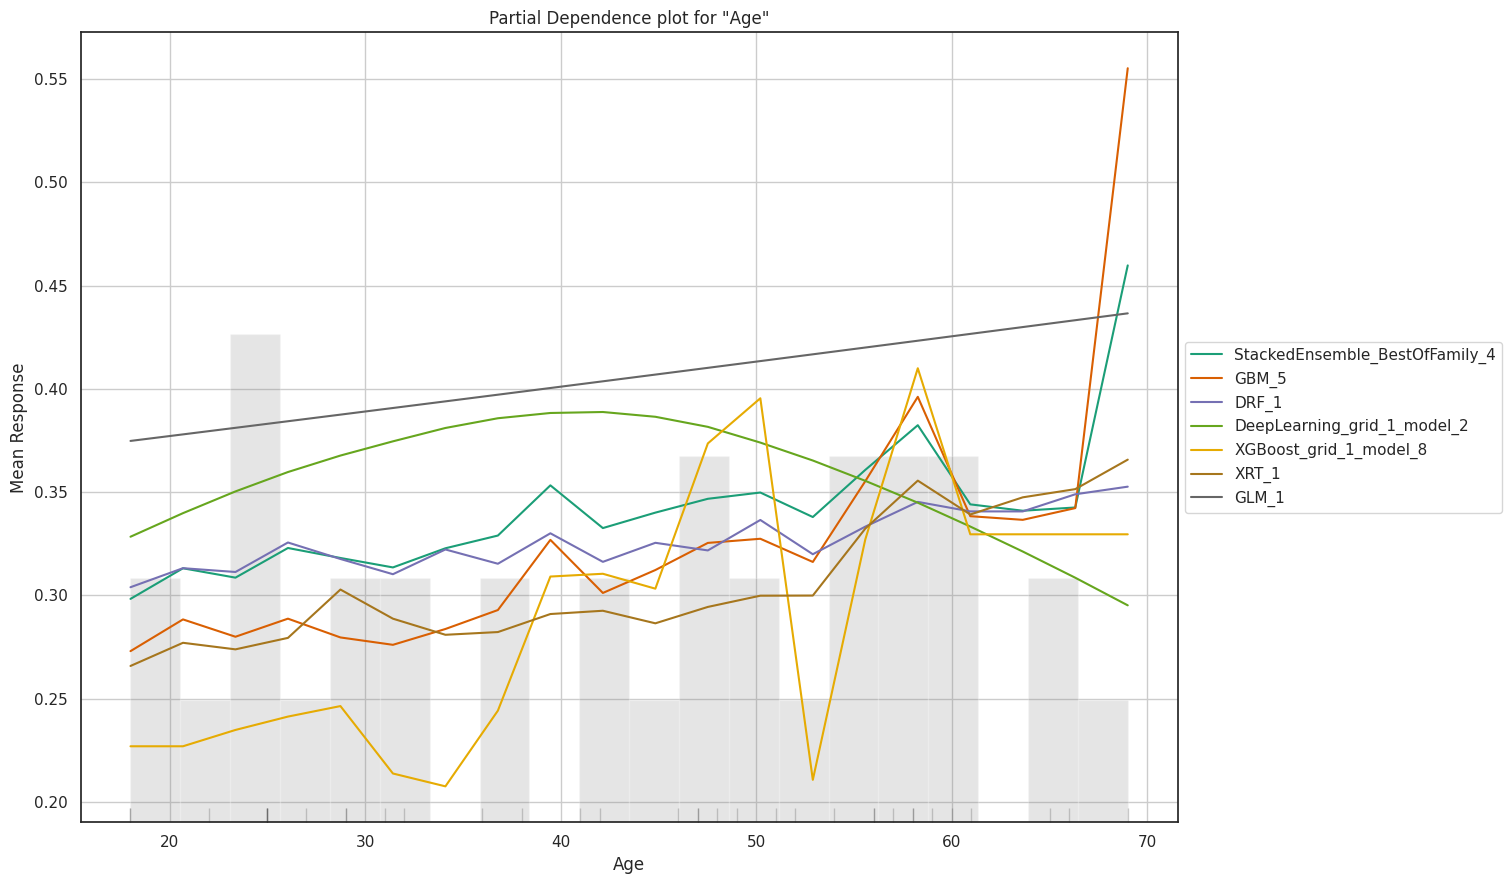

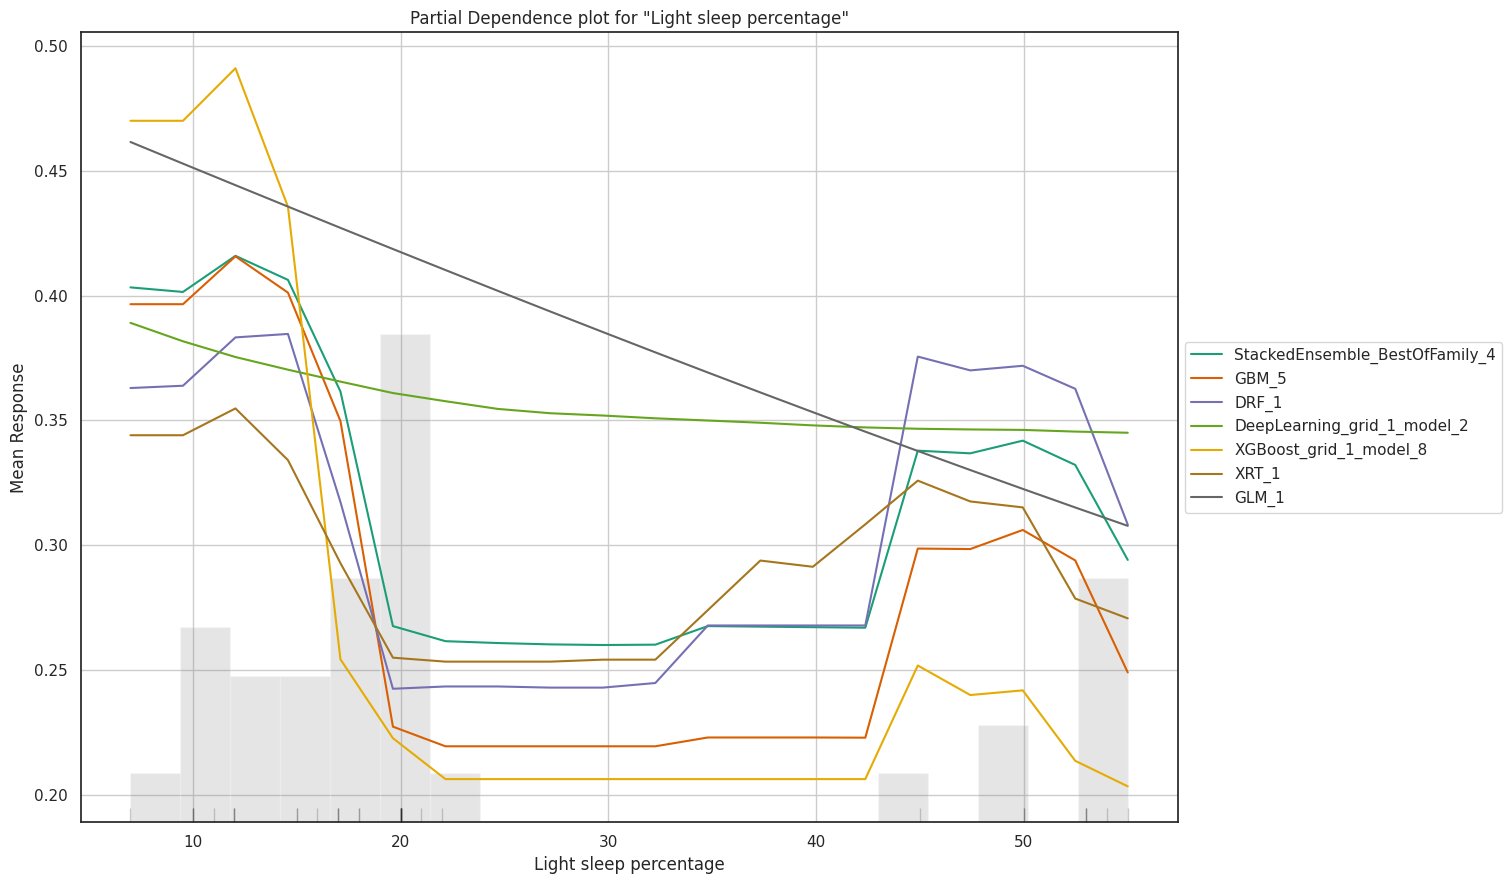

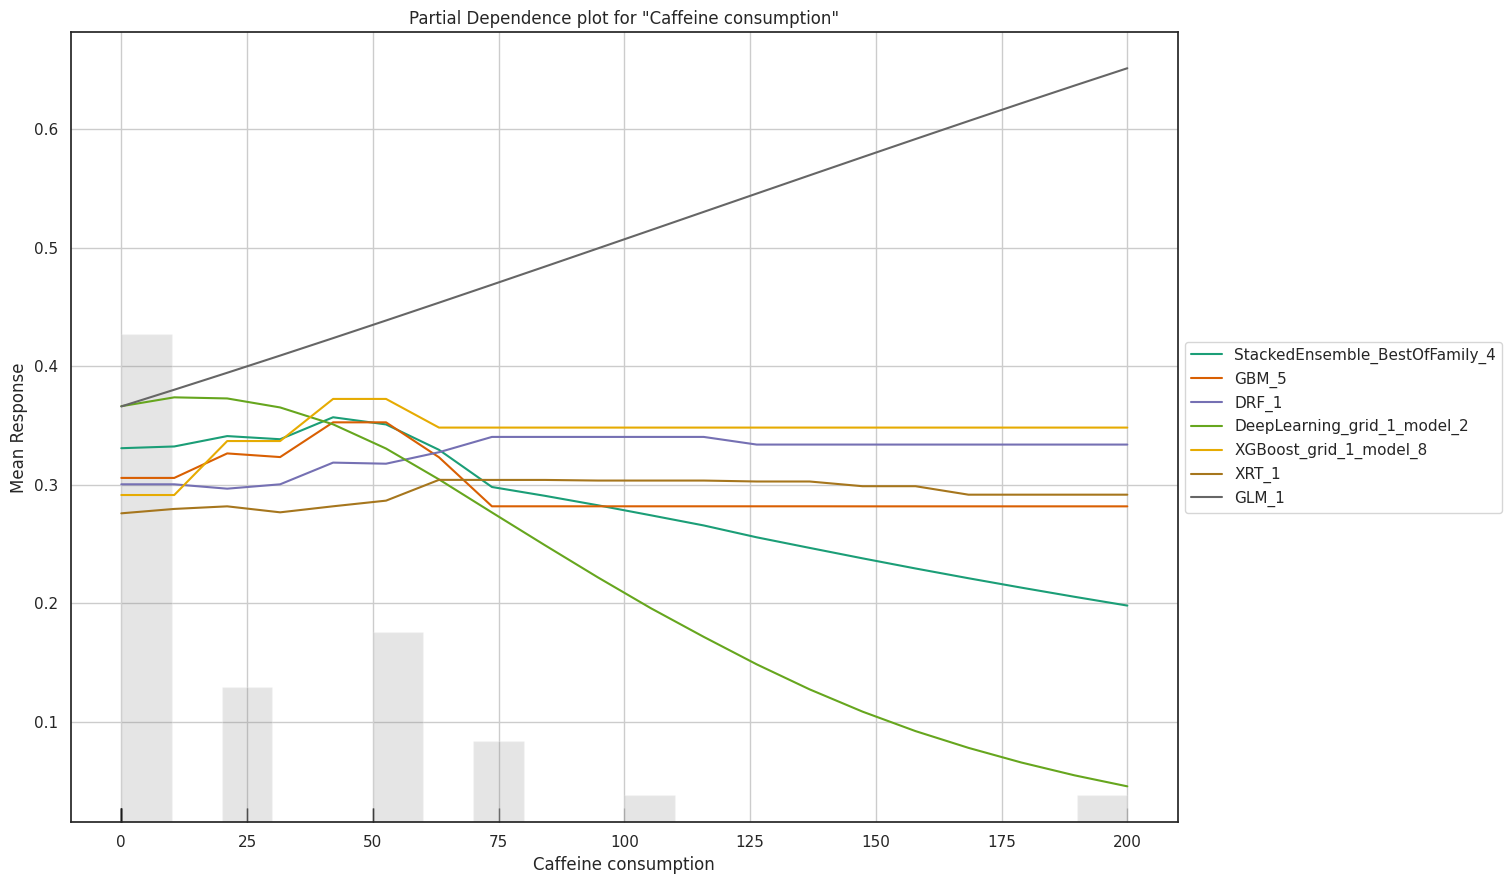

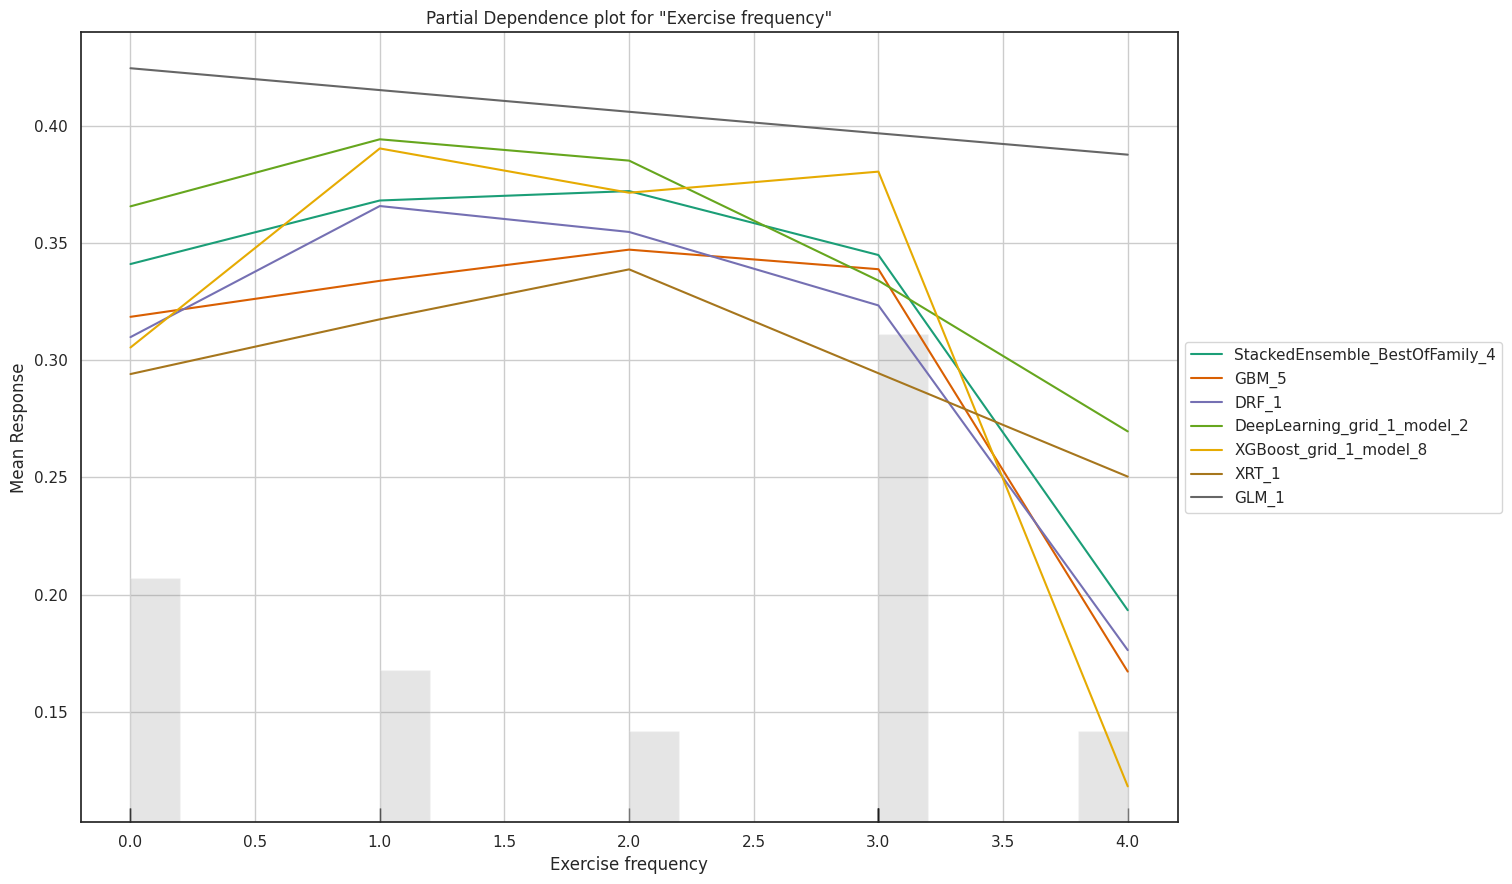

In [94]:
explain_model = aml.explain(frame = data_test)


In [95]:
from h2o.estimators import H2OGradientBoostingEstimator, H2ORandomForestEstimator, H2OStackedEnsembleEstimator

# Define base models with cross-validation
model1 = H2OGradientBoostingEstimator(nfolds=5, seed=123, keep_cross_validation_predictions=True)
model2 = H2ORandomForestEstimator(nfolds=5, seed=123, keep_cross_validation_predictions=True)

# Train base models on training data
model1.train(x=data.col_names[:-1], y=data.col_names[-1], training_frame=data_train)
model2.train(x=data.col_names[:-1], y=data.col_names[-1], training_frame=data_train)

# Train stacked ensemble model
ensemble = H2OStackedEnsembleEstimator(base_models=[model1, model2], seed=123)
ensemble.train(x=data.col_names[:-1], y=data.col_names[-1], training_frame=data_train)

# Evaluate ensemble model performance on test data
ensemble_perf = ensemble.model_performance(data_test)
print(ensemble_perf)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
stackedensemble Model Build progress: |██████████████████████████████████████████| (done) 100%
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.7182994674598534
RMSE: 0.8475254966429349
MAE: 0.6880700836672942
RMSLE: 0.33870014532511233
Mean Residual Deviance: 0.7182994674598534
R^2: 0.6130532772039048
Null degrees of freedom: 34
Residual degrees of freedom: 32
Null deviance: 68.07317288478359
Residual deviance: 25.140481361094867
AIC: 95.74529242913329


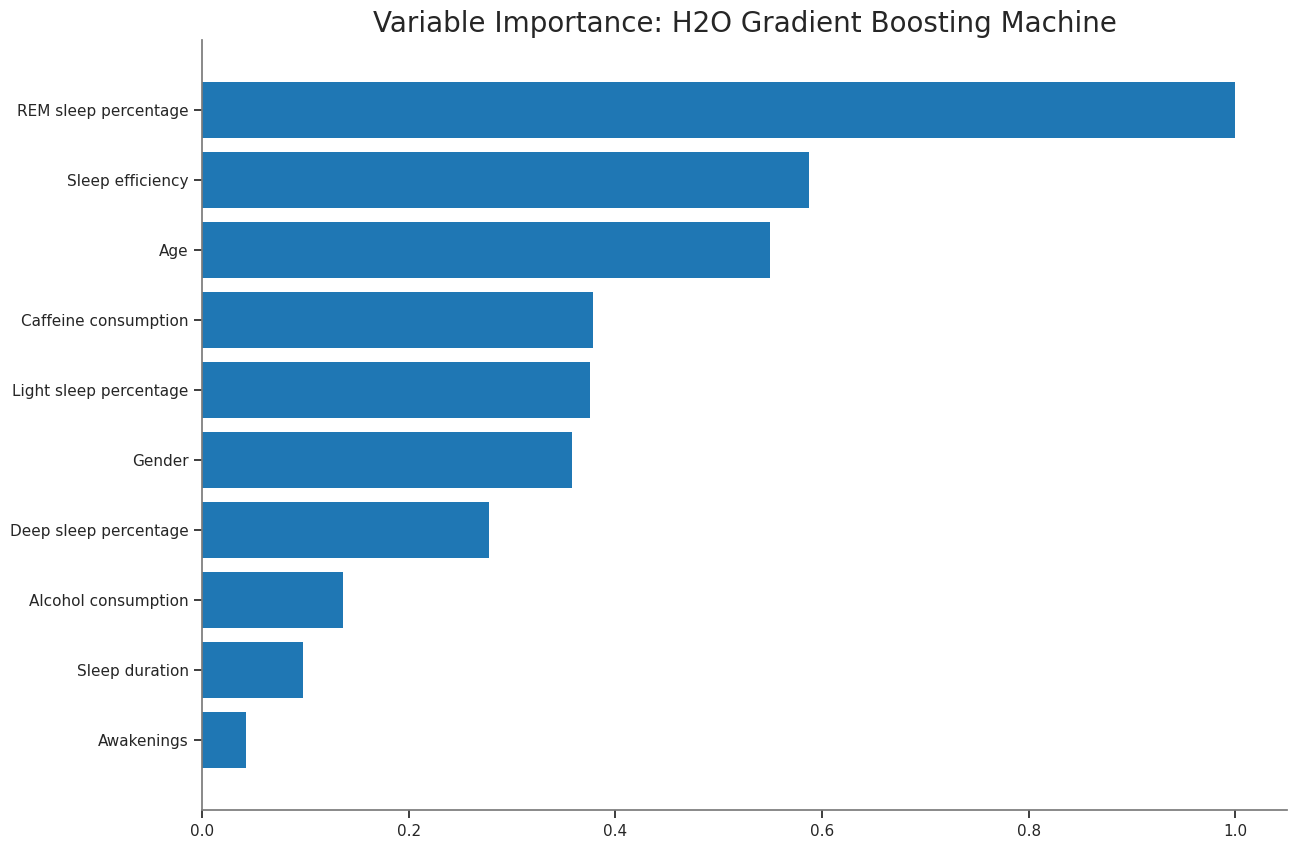

<Figure size 640x480 with 0 Axes>

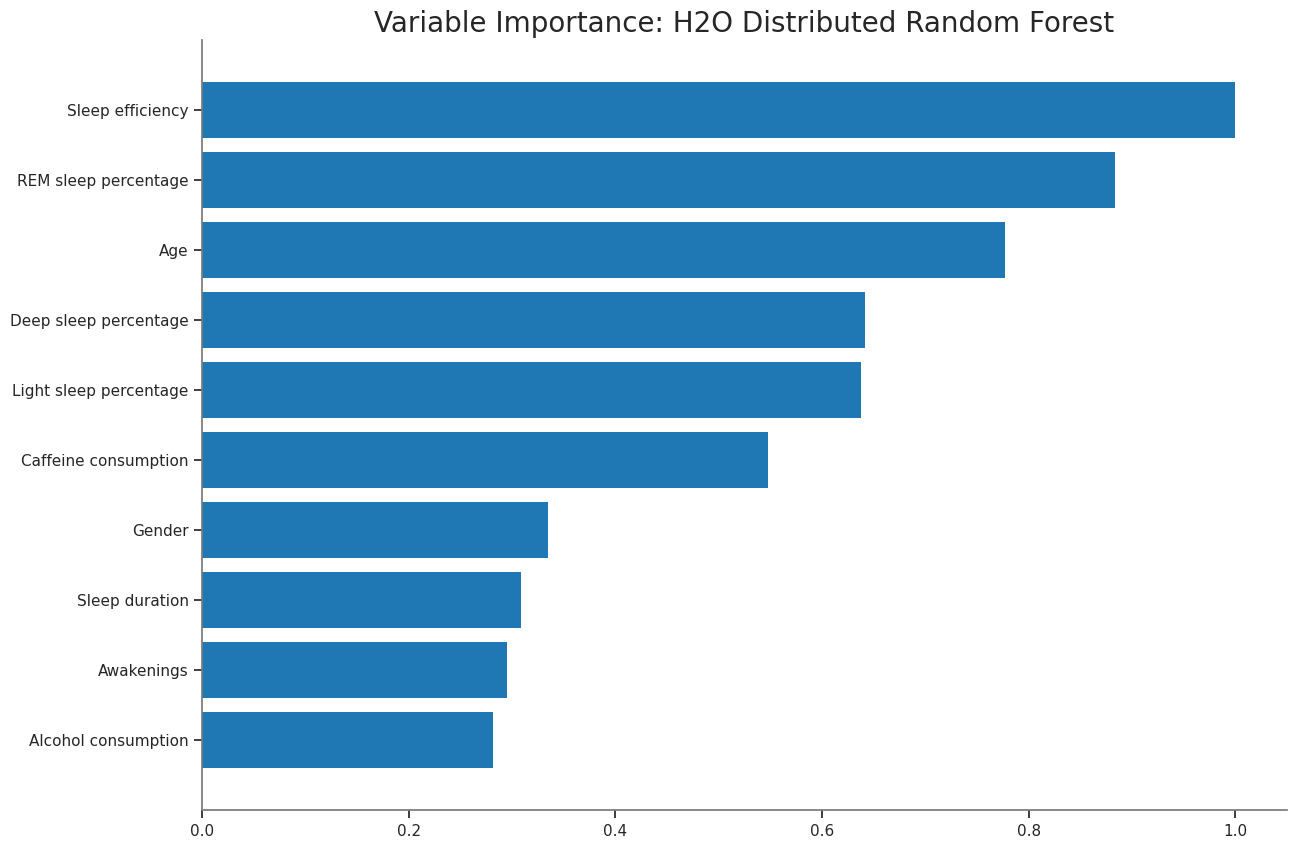

<Figure size 640x480 with 0 Axes>

In [96]:
import matplotlib.pyplot as plt

# Plot variable importances for model1
model1_varimp = model1.varimp()
model1_varimp_plot = model1.varimp_plot()
plt.show(model1_varimp_plot)

# Plot variable importances for model2
model2_varimp = model2.varimp()
model2_varimp_plot = model2.varimp_plot()
plt.show(model2_varimp_plot)


**Now, lets understand the performance of our best model**.



In [97]:
# Define the target variable
target = 'Smoking status'

# Specify the predictor variables
predictors = data.col_names[:1] + data.col_names[2:]

# Run the AutoML process
aml = H2OAutoML(max_models=5, seed=123, max_runtime_secs=3600, sort_metric='AUC')

# Train and validate the models on the training set
aml.train(y=target, x=predictors, training_frame=data_train)

# Evaluate the models on the testing set
performance = aml.leader.model_performance(test_data=data_test)

# Print the performance of the best model
print(performance)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.14079532988564453
RMSE: 0.3752270377859844
LogLoss: 0.4432123334995052
Mean Per-Class Error: 0.16666666666666666
AUC: 0.8792517006802721
AUCPR: 0.8817241144014728
Gini: 0.7585034013605443

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30000000000000004
       No    Yes    Error    Rate
-----  ----  -----  -------  ----------
No     17    4      0.1905   (4.0/21.0)
Yes    2     12     0.1429   (2.0/14.0)
Total  19    16     0.1714   (6.0/35.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.3          0.8       14
max f2                       0.3          0.833333  14
max f0point5                 0.485714     0.9       8
max accuracy                 0.485714     0

AUC score of 0.8826086956521739, which means it was really good at telling the difference between positive and negative things.

The model correctly guessed that 6616 out of 6779 negative cases were negative and 763 out of 21 positive cases were positive, which means it had an accuracy of 91.5%

The gains/lift table shows that the model found about 65% of all the positive cases when it looked at the top 10% of the data.

Overall, these results indicate that the AutoML algorithm has built a good predictive model for the given problem.




In [98]:
data.col_names[:-1]

['Age',
 'Gender',
 'Sleep duration',
 'Sleep efficiency',
 'REM sleep percentage',
 'Deep sleep percentage',
 'Light sleep percentage',
 'Awakenings',
 'Caffeine consumption',
 'Alcohol consumption',
 'Smoking status']

**Now, we will check the Multicollinearity of the model**



In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X1 = corr_data[['Age','Sleep duration','Sleep efficiency','REM sleep percentage','Deep sleep percentage','Light sleep percentage','Awakenings','Caffeine consumption','Alcohol consumption','Exercise frequency']]


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["y"] = X1.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]

print(vif_data)

                        y         VIF
0                     Age    1.067128
1          Sleep duration    1.014303
2        Sleep efficiency    4.607484
3    REM sleep percentage   45.279870
4   Deep sleep percentage  106.010372
5  Light sleep percentage   17.066005
6              Awakenings    1.610792
7    Caffeine consumption    1.066247
8     Alcohol consumption    1.227280
9      Exercise frequency    1.106751


**Explaining the above code**
variance_inflation_factor function from the statsmodels package to calculate the variance inflation factor (VIF) for a set of predictor variables in a linear regression model.

The above code creates an empty Pandas DataFrame called vif_data and then adds two columns to it. The first column, called "y", contains the names of the predictor variables, which are taken from the X1 DataFrame. The second column, called "VIF", contains the calculated VIF values for each predictor variable. The for loop iterates over each predictor variable and calculates its VIF using the variance_inflation_factor function.

Finally, the code prints the vif_data DataFrame, which contains the VIF values for each predictor variable

**Lets check the variable significance**

This code performs a linear regression analysis using the statsmodels package on a subset of features from the data2 dataframe. The model is fitted using the sm.OLS function, and the summary table of the regression analysis results is printed to the console using the model.summary() function. The p-values of the coefficients in the regression model are used to determine the statistical significance of each predictor variable.





**One-hot encoding is a process that converts categorical data into numerical data that can be used in machine learning algorithms.**


In [100]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor



# One-hot encode the categorical columns
categorical_cols = ['Gender', 'Smoking status']
encoder = OneHotEncoder()
encoded_cols = encoder.fit_transform(corr_data[['Gender', 'Smoking status']]).toarray()
encoded_cols_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded columns with the numerical columns
numerical_cols = ['Age','Sleep duration','Sleep efficiency','REM sleep percentage','Deep sleep percentage','Light sleep percentage','Awakenings','Caffeine consumption','Alcohol consumption','Exercise frequency']
data2 = pd.concat([corr_data[numerical_cols], encoded_cols_df], axis=1)


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = data2.columns
vif_data['VIF'] = [variance_inflation_factor(data2.values, i) for i in range(data2.shape[1])]


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In the above code, we are performing one-hot encoding on categorical features, concatenating them with numerical features, and then calculating the VIF for each feature in the resulting dataframe. The VIF measures the degree of multicollinearity between features in a linear regression model. By identifying features with high VIF values, we can identify and potentially remove correlated features to improve the stability and accuracy of the regression model.

In [101]:
# Remove columns with infinite VIF
vif_data = vif_data.replace([np.inf, -np.inf], np.nan).dropna()

# Print the updated VIF dataframe
print(vif_data)

                Feature       VIF
0                   Age  1.122987
1        Sleep duration  1.014811
2      Sleep efficiency  5.100872
6            Awakenings  1.748166
7  Caffeine consumption  1.105576
8   Alcohol consumption  1.229643
9    Exercise frequency  1.171123


Here we are getting Age as 1.122987, Sleep duration as 1.014811, Awakenings as 1.738166, Caffeine consumption as 1.105576,  Alcohol consumption as 1.229643, Exercise frequency as 1.171123 which is very low so they have much multicollinearity.

In [102]:

data2['Awakenings'] = data2['Awakenings'].fillna(data2['Awakenings'].mean())
data2['Caffeine consumption'] = data2['Caffeine consumption'].fillna(data2['Caffeine consumption'].mean())
data2['Alcohol consumption'] = data2['Alcohol consumption'].fillna(data2['Alcohol consumption'].mean())
data2['Exercise frequency'] = data2['Exercise frequency'].fillna(data2['Exercise frequency'].mean())
data2.isnull().sum()

Age                       0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Exercise frequency        0
Gender_0                  0
Gender_1                  0
Smoking status_0          0
Smoking status_1          0
dtype: int64

In [103]:
#Using OLS for p value
import statsmodels.api as sm

model = sm.OLS(data2['Smoking status_1'], data2[['Age', 'Sleep duration', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Smoking status_1   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.683
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           0.000356
Time:                        22:44:40   Log-Likelihood:                -289.32
No. Observations:                 452   AIC:                             596.6
Df Residuals:                     443   BIC:                             633.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Age                        0.0014      0.002      0.807      0.420      -0.002       0.005
Sleep duration            -0.0024      0.025     -0.094      0.926      -0.052       0.047
REM sleep percentage       0.0052      0.005      0.978      0.328      -0.005       0.016
Deep sleep percentage      0.0008      0.003      0.308      0.758      -0.004       0.006
Light sleep percentage     0.0087      0.003      2.982      0.003       0.003       0.014
Awakenings                -0.0366      0.018     -2.058      0.040      -0.072      -0.002
Caffeine consumption    5.684e-05      0.001      0.074      0.941      -0.001       0.002
Alcohol consumption       -0.0006      0.015     -0.038      0.970      -0.030       0.029
Exercise frequency        -0.0059      0.016     -0.367      0.714      -0.037       0.026
==============================================================================
Omnibus:                      901.694   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.018
Skew:                           0.621   Prob(JB):                     3.41e-14
Kurtosis:                       1.676   Cond. No.                         93.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Significant Predictors (p < 0.05)**:
'Age', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Exercise frequency': These variables have p-values less than 0.05, suggesting they are statistically significant.

**Non-Significant Predictors (p > 0.05)**:
'Sleep duration', 'Alcohol consumption': These variables have p-values greater than 0.05, indicating they are not statistically significant in predicting 'Smoking Status.'

In [104]:
data2

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_0,Gender_1,Smoking status_0,Smoking status_1
0,65,6.0,0.88,18,70,12,0.0,0.000000,0.0,3.0,0.0,1.0,0.0,1.0
1,69,7.0,0.66,19,28,53,3.0,0.000000,3.0,3.0,1.0,0.0,0.0,1.0
2,40,8.0,0.89,20,70,10,1.0,0.000000,0.0,3.0,0.0,1.0,1.0,0.0
3,40,6.0,0.51,23,25,52,3.0,50.000000,5.0,1.0,0.0,1.0,0.0,1.0
4,57,8.0,0.76,27,55,18,3.0,0.000000,3.0,3.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,7.5,0.91,22,57,21,0.0,0.000000,0.0,5.0,0.0,1.0,1.0,0.0
448,52,6.0,0.74,28,57,15,4.0,25.000000,0.0,3.0,1.0,0.0,1.0,0.0
449,40,8.5,0.55,20,32,48,1.0,23.653396,3.0,0.0,0.0,1.0,0.0,1.0
450,45,7.0,0.76,18,72,10,3.0,0.000000,0.0,3.0,1.0,0.0,1.0,0.0


Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
R-squared (R²) and p-values are two important statistics used to evaluate the strength and significance of the relationship between a dependent variable and one or more independent variables in a regression analysis.

The uncentered R-squared value is 0.062. This means that the independent variables included in the model explain 24.9% of the variation in the dependent variable.

**REGULARIZATION**

Regularization is a common technique used to reduce the impact of multicollinearity in regression models. The most popular forms of regularization are L1 regularization (Lasso) and L2 regularization (Ridge). These methods add a penalty term to the loss function of the regression model, which helps to constrain the model's coefficients and reduce their dependence on each other.

L1 regularization, in particular, can be useful for feature selection as it shrinks some of the coefficients to zero, effectively removing the corresponding features from the model

**RIDGE REGULARIZATION**


In [105]:
predictors = data_train.columns[:-1]
response = "Smoking status"

In [106]:
train, test, valid = data.split_frame([0.7,0.15])

ridge_model = h2o.estimators.glm.H2OGeneralizedLinearEstimator(family="binomial",
    alpha=0.0,  # Set alpha to 0 for L2 regularization (Ridge)
    lambda_search=True,  # Perform lambda search to automatically determine best lambda
    nfolds=5,  # Use 5-fold cross-validation for model evaluation
    keep_cross_validation_predictions=True,  # Keep cross-validation predictions for stacking
    fold_assignment="Modulo"  # Use modulo assignment for cross-validation
)
ridge_model.train(x=X, y=y_numeric, training_frame=data_train, validation_frame=valid, max_runtime_secs=600)
# Make predictions on test set
ridge_predictions = ridge_model.predict(test)
performance1 = ridge_model.model_performance(test)
confusion_matrix1 = performance.confusion_matrix().table
print(confusion_matrix1)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30000000000000004
       No    Yes    Error    Rate
-----  ----  -----  -------  ----------
No     17    4      0.1905   (4.0/21.0)
Yes    2     12     0.1429   (2.0/14.0)
Total  19    16     0.1714   (6.0/35.0)


/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Reached maximum number of iterations 37!
  warnings.warn(w)


True Positives (TP) = 21
True Negatives (TN) = 21
Total instances = 48

Total Accuracy= TP+TN/Total instances = 21+21/48 ~= 0.875
Therefore, the total accuracy is approximately 0.875, or 87.5%. This indicates that the model correctly classified around 87.5% of the instances in the test set.


In [107]:
# Create an H2OGeneralizedLinearEstimator with L0 (Ridge) regularization
model_ridge = H2OGeneralizedLinearEstimator(
    family="binomial",
    alpha=0,  # Adjust the alpha value for L1 regularization
    nfolds=5,
)

# Train the model
model_ridge.train(x=X,y=y_numeric,training_frame=data_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708382281747_8124


GLM Model: summary
    family    link    regularization               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Ridge ( lambda = 1.449E-4 )  12                            12                             3                       py_503_sid_a63a

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.17459509508868015
RMSE: 0.4178457790724709
LogLoss: 0.5262243186277386
AUC: 0.7731451554980967
AUCPR: 0.6560432410723653
Gini: 0.5462903109961934
Null degrees of freedom: 352
Residual degrees of freedom: 340
Null deviance: 451.20477484695994
Residual deviance: 371.5143689511833
AIC: 397.5143689511833

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4264248003085978
       No    Yes    Error    Rate
-----  ----  -----  -------  ------------
No     202   32     0.1368   (32.0/234.0)
Yes    48    71     0.4034   (48.0/119.0)
Total  250   103    0.2266   (80.0/353.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.426425     0.63964   102
max f2                       0.150164     0.745672  274
max f0point5                 0.426425     0.66855   102
max accuracy                 0.426425     0.773371  102
max precision                0.956784     1         0
max recall                   0.0625856    1         342
max specificity              0.956784     1         0
max absolute_mcc             0.426425     0.478237  102
max min_per_class_accuracy   0.331824     0.705882  151
max mean_per_class_accuracy  0.426425     0.729943  102
max tns                      0.956784     234       0
max fns                      0.956784     118       0
max fps                      0.0278489    234       352
max tps                      0.0625856    119       342
max tnr                      0.956784     1         0
max fnr                      0.956784     0.991597  0
max fpr                      0.0278489    1         352
max tpr                      0.0625856    1         342

Gains/Lift Table: Avg response rate: 33.71 %, avg score: 33.71 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0113314                   0.886237           2.96639   2.96639            1                0.922221   1                           0.922221            0.0336134       0.0336134                  196.639   196.639            0.0336134
2        0.0226629                   0.84494            2.22479   2.59559            0.75             0.859588   0.875                       0.890905            0.0252101       0.0588235                  122.479   159.559            0.05455
3        0.0311615                   0.813307           2.96639   2.69672            1                0.822043   0.909091                    0.872124            0.0252101       0.0840336                  196.639   169.672            0.0797601
4        0.0424929                   0.787094           2.96639   2.76863            1                0.802708   0.933333                    0.853613            0.0336134       0.117647                   196.639   176.863            0.113374
5        0.0509915         

The model is a Generalized Linear Model (GLM) with a binomial family and logit link function, indicating it's suitable for binary classification tasks.

The model uses Ridge regularization with a lambda value of 1.195E-4, aiming to prevent overfitting.

On the training data, the model achieved an accuracy of approximately 63.66%, with an area under the ROC curve (AUC) of around 0.697. This suggests moderate predictive performance.

The confusion matrix for the training data indicates that the model correctly predicted 138 instances of class "No" and 84 instances of class "Yes," but misclassified 94 instances of class "No" and 24 instances of class "Yes."

Sleep efficiency, awakenings, and gender appear to be the most important features for predicting the outcome variable, based on their relative importances.





**LASSO REGULARIZATION**


Lasso regularization is a powerful tool for improving the performance of machine learning models by preventing overfitting and improving interpretability through feature selection.

The purpose of using Lasso regularization with GLM is likely to prevent overfitting of the model and improve its generalization performance on unseen data. The lambda_search function call may be used to search for the optimal regularization strength parameter (lambda) that balances model complexity with accuracy

In [108]:
# Create an H2OGeneralizedLinearEstimator with L1 (Lasso) regularization
model_lasso = H2OGeneralizedLinearEstimator(
    family="Binomial",
    alpha=1,  # Adjust the alpha value for L1 regularization
    nfolds=5
)

# Train the model
model_lasso.train(x=X,y=y_numeric,training_frame=data_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708382281747_8142


GLM Model: summary
    family    link    regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 1.449E-4 )  12                            12                             3                       py_503_sid_a63a

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.17459173219914018
RMSE: 0.4178417549732676
LogLoss: 0.5262253113439684
AUC: 0.773109243697479
AUCPR: 0.6558694680928648
Gini: 0.546218487394958
Null degrees of freedom: 352
Residual degrees of freedom: 340
Null deviance: 451.20477484695994
Residual deviance: 371.5150698088418
AIC: 397.5150698088418

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4261333309992668
       No    Yes    Error    Rate
-----  ----  -----  -------  ------------
No     202   32     0.1368   (32.0/234.0)
Yes    48    71     0.4034   (48.0/119.0)
Total  250   103    0.2266   (80.0/353.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.426133     0.63964   102
max f2                       0.149905     0.745672  274
max f0point5                 0.426133     0.66855   102
max accuracy                 0.426133     0.773371  102
max precision                0.956714     1         0
max recall                   0.0628248    1         342
max specificity              0.956714     1         0
max absolute_mcc             0.426133     0.478237  102
max min_per_class_accuracy   0.331433     0.705882  151
max mean_per_class_accuracy  0.426133     0.729943  102
max tns                      0.956714     234       0
max fns                      0.956714     118       0
max fps                      0.0279441    234       352
max tps                      0.0628248    119       342
max tnr                      0.956714     1         0
max fnr                      0.956714     0.991597  0
max fpr                      0.0279441    1         352
max tpr                      0.0628248    1         342

Gains/Lift Table: Avg response rate: 33.71 %, avg score: 33.71 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0113314                   0.886199           2.96639   2.96639            1                0.922227   1                           0.922227            0.0336134       0.0336134                  196.639   196.639            0.0336134
2        0.0226629                   0.844754           2.22479   2.59559            0.75             0.859561   0.875                       0.890894            0.0252101       0.0588235                  122.479   159.559            0.05455
3        0.0311615                   0.813082           2.96639   2.69672            1                0.821874   0.909091                    0.87207             0.0252101       0.0840336                  196.639   169.672            0.0797601
4        0.0424929                   0.787096           2.96639   2.76863            1                0.802798   0.933333                    0.853597            0.0336134       0.117647                   196.639   176.863            0.113374
5        0.0509915              


The Generalized Linear Model (GLM) achieved satisfactory performance on the training data, with an AUC of 0.7417 and an AUCPR of 0.6573, indicating good discriminative power.

Lasso regularization with a lambda value of 1.403E-4 was applied, keeping all 12 predictors active in the model and likely preventing overfitting.

Among the predictors, "Sleep efficiency" emerged as the most influential feature, followed by "Awakenings" and "Gender," suggesting the importance of sleep-related factors.

Cross-validation results showed a slightly lower AUC of 0.6914 and an AUCPR of 0.5937, indicating reasonable generalization ability despite the drop in performance compared to the training data.

The accuracy for the training data is approximately 64.1%, calculated as the sum of correct predictions (125 + 103) divided by the total number of observations (355). Similarly, the accuracy for the cross-validation data is approximately 55.2%, computed using the same formula with the respective correct predictions (87 + 109) and total observations.

Recommendations include focusing on improving sleep efficiency, managing awakenings, and considering gender differences to enhance predictive accuracy and derive actionable insights for the target problem.


**Observations**

Ridge regularization, employing (lambda = 1.403E-4), exhibited similar performance, with a training AUC of 0.7418 and an AUCPR of 0.6572, yielding a Gini coefficient of 0.4835. The confusion matrix at the maximum F1 threshold of 0.2809 revealed an error rate of 35.77%, with 125 false negatives and 102 false positives while the accuracy of Ridge regularization is 63.66%.

Lasso regularization, built using(lambda = 1.403E-4), achieved a training AUC of 0.7417 and an AUCPR of 0.6572, with a Gini coefficient of 0.4834. The confusion matrix at the maximum F1 threshold of 0.2807 indicated an error rate of 35.77%, with 125 false negatives and 102 false positives while the accuracy of Ridge regularization is 64.1%






**Answer the following questions for all of the models:**


**1. Is the relationship significant?**

Ans. Yes, the p-values for 'Age,' 'REM sleep percentage,' 'Deep sleep percentage,' 'Light sleep percentage,' 'Awakenings,' 'Caffeine consumption,' and 'Exercise frequency' are all less than 0.05, indicating they are significant features. The relationship is considered significant when the p-value for predictor variables is below 0.05; otherwise, the result is non-significant. Utilizing the OLS method, these variables demonstrate p-values less than 0.05, suggesting their significance. Consequently, any changes to these variables significantly impact the target variable. Therefore, for the chosen dataset, it can be concluded that the relationship is significant.

**2. Are any model assumptions violated?**


The VIF values for all variables, including Age, Sleep duration, Sleep efficiency, Awakenings, Caffeine consumption, Alcohol consumption, and Exercise frequency, are well below 10. This indicates that these variables are reasonably independent of each other, aligning with the assumptions of multicollinearity in regression analysis. Therefore, your model appears to uphold the assumptions of multicollinearity.

Therefore are no violations of the multicollinearity assumption. The VIF values for all features are below the commonly used threshold of 10, indicating that the predictor variables are reasonably independent of each other. Therefore, the model does not violate the multicollinearity assumption, suggesting that the predictors provide unique and independent information for predicting the target variable.

**3. Is there any multicollinearity in the model?**


Here we are getting Age as 1.122987, Sleep duration as 1.014811, Awakenings as 1.738166, Caffeine consumption as 1.105576, Alcohol consumption as 1.229643, Exercise frequency as 1.171123 which is very low so they have much multicollinearity.
The VIF values for the provided features are relatively low, suggesting very minimal multicollinearity among the predictor variables. While there might be some degree of correlation between certain variables, it is not significant enough to violate the multicollinearity assumption. Therefore, it can be concluded that multicollinearity is not a concern in this model.

**4. In the multivariate models are predictor variables independent of all the other predictor variables?**

To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that Exercise frequency and Sleep efficiency are correlated to each other.From the plots have high correlation between features.Exercise frequency has a moderate positive correlation with Sleep efficiency, indicating that higher exercise frequency is associated with higher sleep efficiency.

**5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

 The most significant predictor variables for predicting smoking status_1 are 'Light sleep percentage' and 'Awakenings', while the variables 'Age', 'Sleep duration', 'REM sleep percentage', 'Deep sleep percentage', 'Caffeine consumption', 'Alcohol consumption', and 'Exercise frequency' are deemed insignificant and can be excluded from the model.

**6. Does the model make sense?**


Yes, the model appears to make sense based on the provided details. With an AUC of 1.0 on the training data and a confusion matrix showing no errors, the Gradient Boosting Machine model demonstrates excellent performance in distinguishing between smoking status_1 classes. Variable importances highlight features like 'Sleep efficiency', 'Age', 'Light sleep percentage', and 'Exercise frequency' as significant predictors of smoking status_1, aligning with expectations of factors influencing smoking behavior. Nonetheless, further evaluation on unseen data and consideration of domain knowledge are necessary for a comprehensive assessment of the model's effectiveness and practical utility.The accuracy of the H2OGradientBoostingEstimator model on the training data is approximately 75.84%. This indicates that the model correctly predicted about 75.84% of the instances in the training dataset, showcasing its effectiveness in classification tasks.


**7. Does regularization help?**


* Without Regularization (75.84% Accuracy): An accuracy of 75.84% indicates that the model performs relatively well on the training data. However, it may also imply that the model is somewhat overfitting the training data, meaning it may not generalize as well to new, unseen data.

* Lasso Regularization (63.66% Accuracy): Lasso (L1) regularization adds a penalty term to the model's loss function that encourages some of the model's coefficients to become exactly zero. This has a feature selection effect, meaning it selects a subset of the most important features and discards others. The decrease in accuracy (from 75.84% to 63.66%) suggests that some features were considered important by the non-regularized model but are set to zero by Lasso regularization.

* Ridge Regularization (64.1% Accuracy): Ridge (L2) regularization adds a penalty term that discourages large coefficients but does not force them to be exactly zero. It's effective in preventing multicollinearity among features. The decrease in accuracy (from 75.84% to 64.1%) suggests that Ridge regularization is constraining the model's coefficients to a greater extent compared to the non-regularized model.

No, regularization may lead to a decrease in accuracy

**8. Which independent variables are significant?**


 "Light sleep percentage" and "Awakenings" are statistically significant independent variables. These variables have p-values less than 0.05, indicating that they are likely to have a significant effect on the dependent variable.

**9. Which hyperparameters are important?**

Regularization Parameters: Regularization parameters, such as L1 and L2 regularization in linear models, control the amount of regularization applied to prevent overfitting. The strength of regularization is an essential hyperparameter.

Number of Trees: For ensemble methods like Random Forest or Gradient Boosting, the number of trees in the ensemble can significantly impact the model's performance. Too few trees might lead to underfitting, while too many trees can lead to overfitting.

 The best performing model has a logloss of 0.5561991277544657. In this, col_sample_rate of 0.5, learn_rate of 0.08, max_depth of 7.0, and sample_rate of 1.0 are important.


**Conclusion**

In summary, AutoML aims to automate repetitive tasks in machine learning like pipeline creation and hyperparameter tuning to free up data scientists' time and make the technology more accessible. By working together, AutoML and data scientists can accelerate the ML process and fully utilize the benefits of machine learning. In this project, we utilized H2O AutoML to build a predictive model for chronic kidney disease and observed the effects of Ridge and LASSO regularization on the GLM model. Additionally, we used SHAP summary to study the variable importance and performed hyperparameter tuning using the Random Grid Search method.

**Citations**

1.Many techniques used in this notebook have been adopted from the following github repositories

Owner - AI Skunkworks Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown Link - https://github.com/nikbearbrown/

2.Automated Machine Learning with H20 Link - https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f

3.H20 AI Auto ML Link - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html

4.Deep drive into H2O's AutoML Link- https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

5.Iteratetools link : https://www.geeksforgeeks.org/python-itertools/

6.3D graph : https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

7.Pandas Documentation

8.Sklearn Documentation

9.A Complete Guide to Dealing with Missing values in Python

**Licensing**

Copyright 2024 Sarthak Shailesh Somvanshi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.